## Heart Attack Prediction Model Using Advanced Machine Learning Techniques 

### Examining the topic

#### What is Heart attack

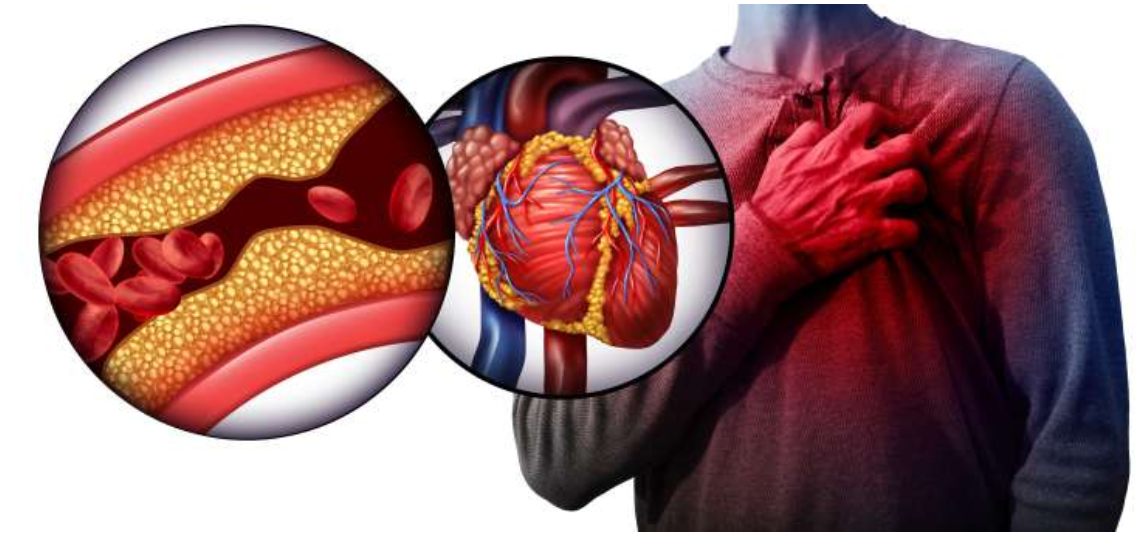

### A heart attack occurs when the flow of blood to the heart is severely reduced or blocked. The blockage is usually due to a buildup of fat, cholesterol and other substances in the heart (coronary) arteries. The fatty, cholesterol-containing deposits are called plaques. The process of plaque buildup is called atherosclerosis.

###  Sometimes, a plaque can rupture and form a clot that blocks blood flow. A lack of blood flow can damage or destroy part of the heart muscle.

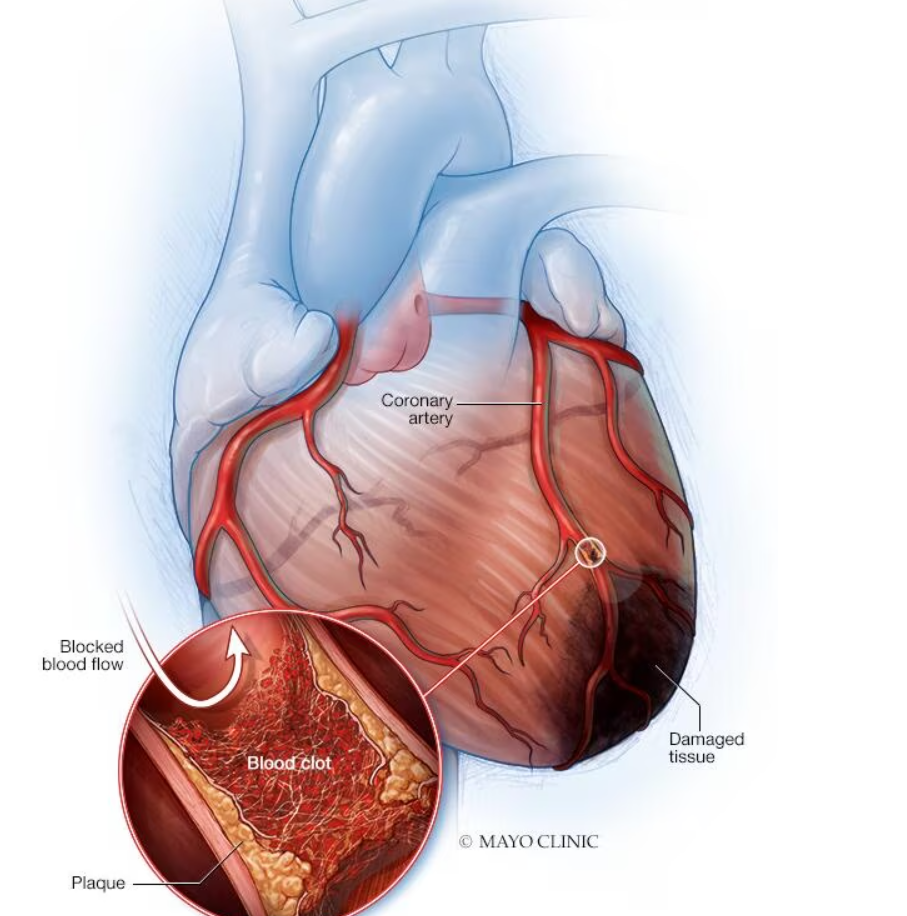

### What are the symptoms of a heart attack?

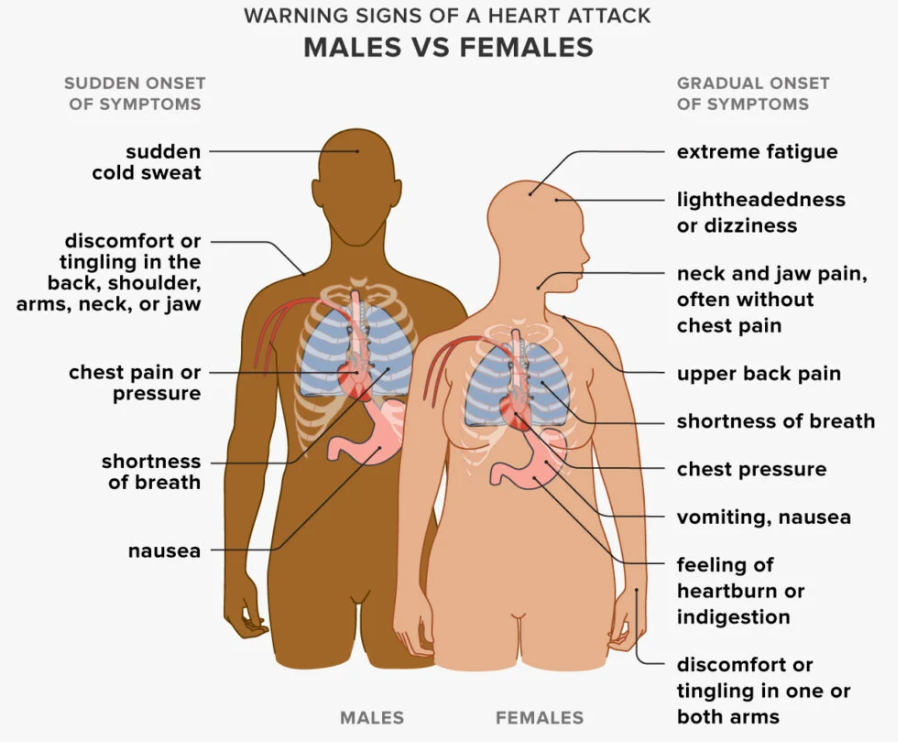

### Data dictionary

#  variable descriptions to help me understand the dataset


##### age - age in years

##### sex - sex (1 = male; 0 = female)

##### cp - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 0 = asymptomatic)

##### trestbps - resting blood pressure (in mm Hg on admission to the hospital)

##### chol - serum cholestoral in mg/dl

##### fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

##### restecg - resting electrocardiographic results (1 = normal; 2 = having ST-T wave abnormality; 0 = hypertrophy)

##### thalach - maximum heart rate achieved

##### exang - exercise induced angina (1 = yes; 0 = no)

##### oldpeak - ST depression induced by exercise relative to rest

##### slope - the slope of the peak exercise ST segment (2 = upsloping; 1 = flat; 0 = downsloping)

##### ca - number of major vessels (0-3) colored by flourosopy

##### thal - 2 = normal; 1 = fixed defect; 3 = reversable defect

##### num - the predicted attribute - diagnosis of heart disease (angiographic disease status) (Value 0 = < diameter narrowing; Value 1 = > 50% diameter narrowing)



## Basic Libraries

In [1]:
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")
import asyncio
from pyppeteer import launch

import matplotlib.pyplot as plt
import seaborn as sns

## Loading The Dataset

In [2]:
df1 = pd.read_csv("D:\Hrt Attack Datasets/heart.csv")

## Initial analysis on the dataset

In [3]:
df1.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  caa  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    0   
3   56    1   1     120   236    0        1       178     0      0.8    0   
4   57    0   0     120   354    0        1       163     1      0.6    0   

   thall  output  
0      1       1  
1      2       1  
2      2       1  
3      2       1  
4      2       1

## Exploratory Data analysis

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Target distribution

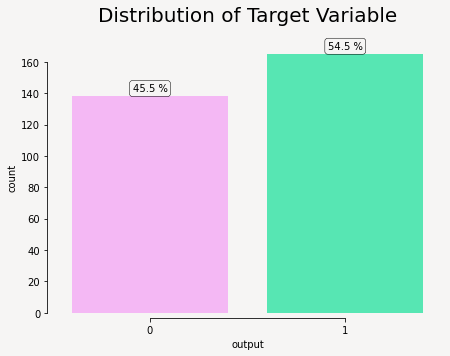

In [5]:
mypalette = ['#FC05FB', '#FEAEFE', '#FCD2FC', '#F3FEFA', '#B4FFE4', '#3FFEBA']

plt.figure(figsize=(7, 5), facecolor='#F6F5F4')
total_records = float(len(df1))
axis = sns.countplot(x=df1['output'], palette=mypalette[1::4])
axis.set_facecolor('#F6F5F4')

for patch in axis.patches:
    height = patch.get_height()
    axis.text(patch.get_x() + patch.get_width() / 2., height + 3, '{:1.1f} %'.format((height / total_records) * 100),
              ha="center", bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

axis.set_title('Distribution of Target Variable', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

### Summary statistics

In [6]:
import pandas as pd

data = df1

df = pd.DataFrame(data)

# Display basic information about the DataFrame
description_df = pd.DataFrame({
    'Column Name': df.columns,
    'Data Type': df.dtypes,
    'Non-null Count': df.count(),
    'Unique Values': df.nunique(),
    'Mean': df.mean(),
    'Min': df.min(),
    '25th Percentile': df.quantile(0.25),
    '50th Percentile (Median)': df.median(),
    '75th Percentile': df.quantile(0.75),
    'Max': df.max()
})

# Display the table
print(description_df)

         Column Name Data Type  Non-null Count  Unique Values        Mean  \
age              age     int64             303             41   54.366337   
sex              sex     int64             303              2    0.683168   
cp                cp     int64             303              4    0.966997   
trtbps        trtbps     int64             303             49  131.623762   
chol            chol     int64             303            152  246.264026   
fbs              fbs     int64             303              2    0.148515   
restecg      restecg     int64             303              3    0.528053   
thalachh    thalachh     int64             303             91  149.646865   
exng            exng     int64             303              2    0.326733   
oldpeak      oldpeak   float64             303             40    1.039604   
caa              caa     int64             303              5    0.729373   
thall          thall     int64             303              4    2.313531   

## Get the number of rows and columns

In [7]:
num_rows, num_columns = df.shape

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 303
Number of columns: 13


## Missing values

In [8]:
(df.isnull().sum()/len(df)).sort_values(ascending=False)

age         0.0
sex         0.0
cp          0.0
trtbps      0.0
chol        0.0
fbs         0.0
restecg     0.0
thalachh    0.0
exng        0.0
oldpeak     0.0
caa         0.0
thall       0.0
output      0.0
dtype: float64

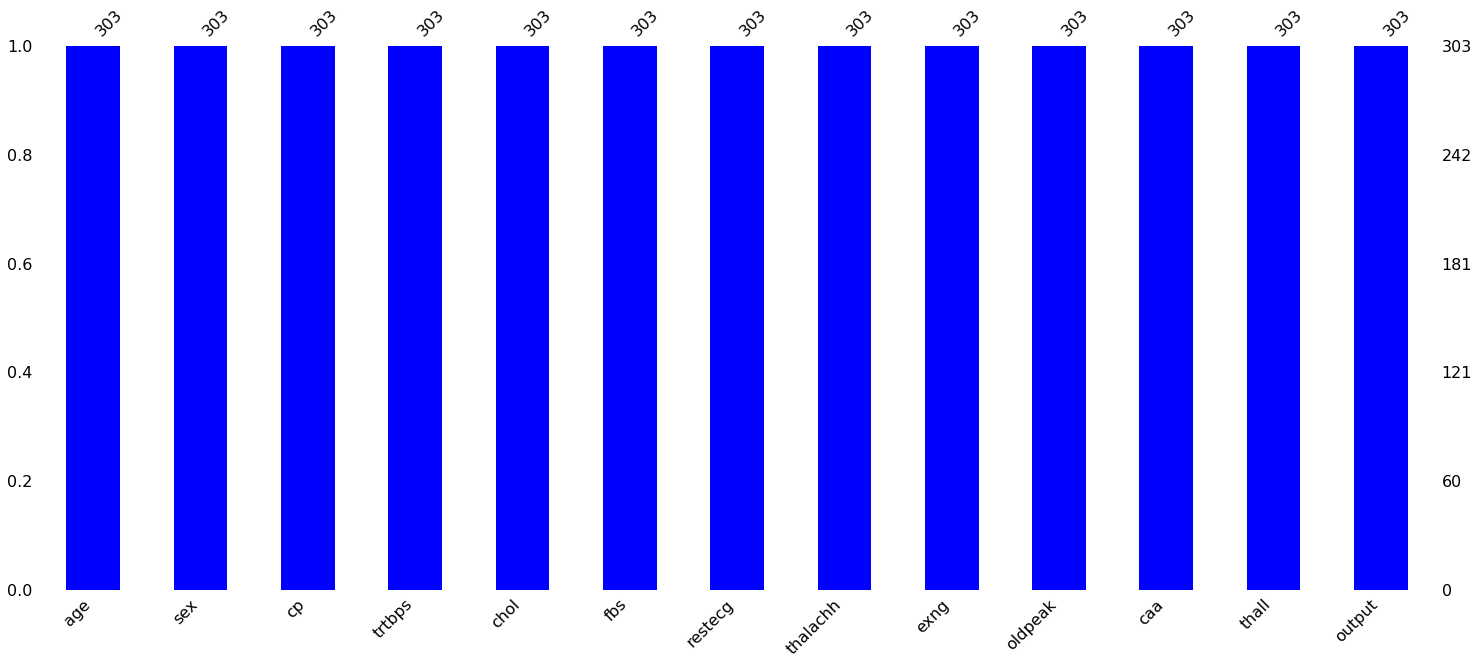

In [11]:
import missingno
import missingno as msno
missingno.bar(df, color = "b")
plt.show()

<AxesSubplot:>

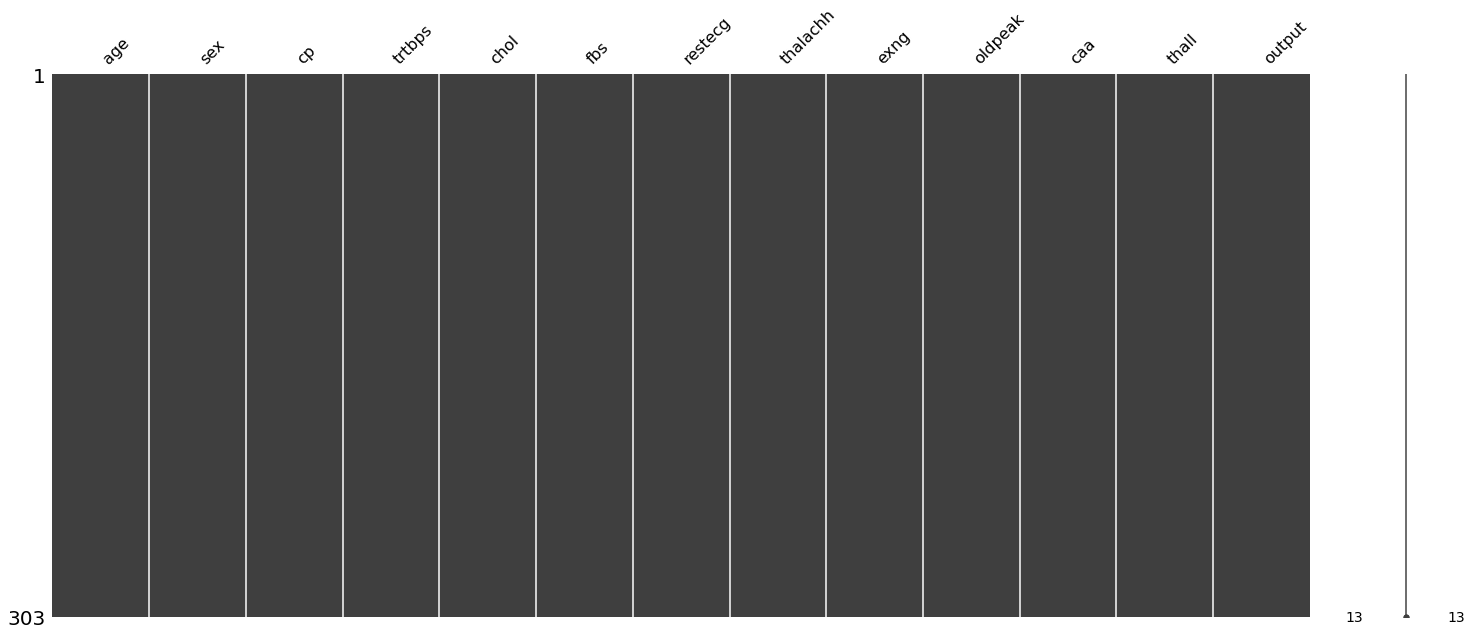

In [12]:
msno.matrix(df)

## The Data Set consists of 303 Rows and 14 Columns.¶
## The type of all the variables in the data set are in numerical format. (Integer Or Float)
## According to first impressions, there is no missing value(NaN Value) in the data set.

## Data visualization


### Classifying data into numerical and categorical features.

In [9]:
data_numerical = df[['age','trtbps','chol','thalachh','oldpeak']] # not including slope as i don't think its useful
data_categorical = df[['sex','cp','fbs','restecg','exng','caa','thall','output']]

### Numerical Variable Analysis

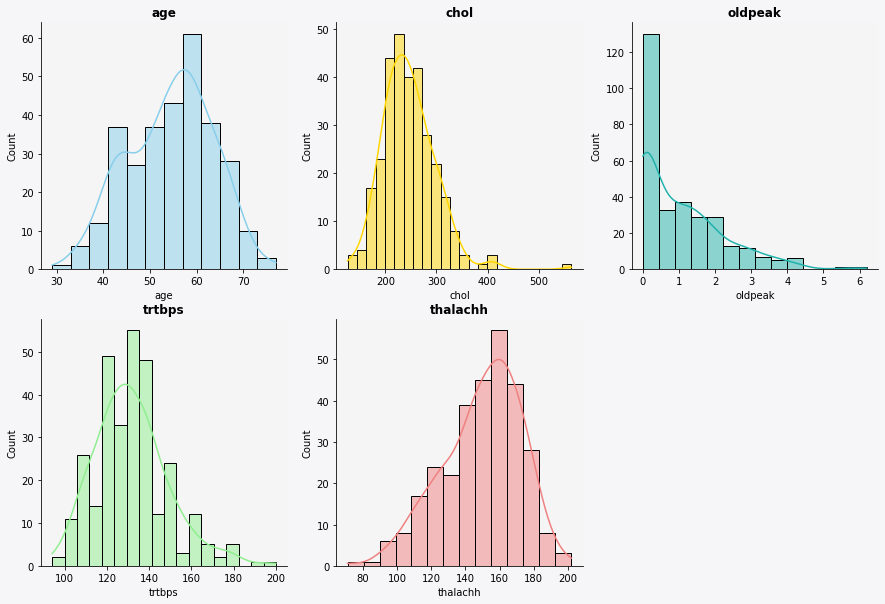

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a 2x3 grid of subplots
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
fig.patch.set_facecolor('#f6f5f7')

# List of colors for the histograms
colors = ['skyblue', 'lightgreen', 'gold', 'lightcoral', 'lightseagreen', 'mediumpurple']

for i, idx in enumerate(data_numerical.columns):
    sns.histplot(ax=ax[i % 2, i // 2], x=data_numerical[idx], color=colors[i], kde=True, alpha=0.5)
    ax[i % 2, i // 2].set_title(idx, fontweight='bold')
    ax[i % 2, i // 2].set_facecolor('#f6f5f5')
    
    for z in ["top", "right"]:
        ax[i % 2, i // 2].spines[z].set_visible(False)

# Hide the last subplot
ax[1, 2].set_visible(False)

plt.show()

#### Observations :
#### 1) Age distribution appears normal with some skewness to the right.

#### 2) Cholesterol appears normally distributed.

#### 3) The old peak is heavily skewed towards the left.

#### 4) Resting bp appears to be normal with some skewness towards left.

#### 5) The maximum heart rate appears normal with some skewness towards right

In [61]:
categoric_axis_name = ["Gender", "Chest Pain Type", "Fasting Blood sugar", "Resting Electrocardiographic Results",
                      "Exercise Induced Angina","Number of Major Vessels", "Thal", "Target"]

In [62]:
list(zip(data_categorical, categoric_axis_name))

[('sex', 'Gender'),
 ('cp', 'Chest Pain Type'),
 ('fbs', 'Fasting Blood sugar'),
 ('restecg', 'Resting Electrocardiographic Results'),
 ('exng', 'Exercise Induced Angina'),
 ('caa', 'Number of Major Vessels'),
 ('thall', 'Thal'),
 ('output', 'Target')]

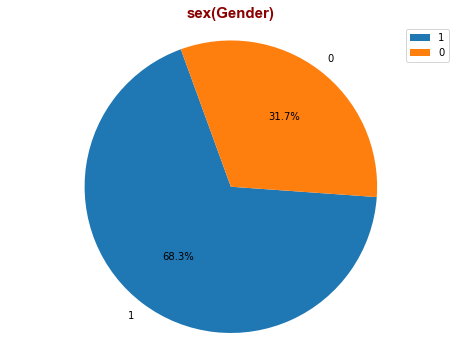

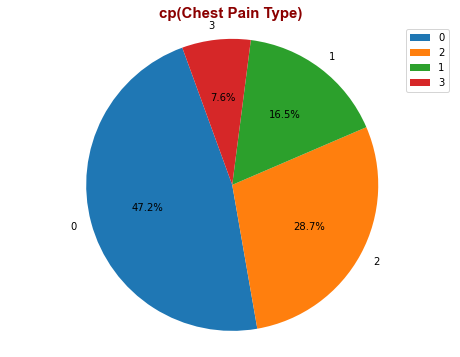

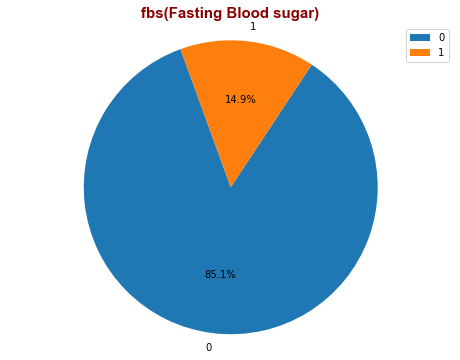

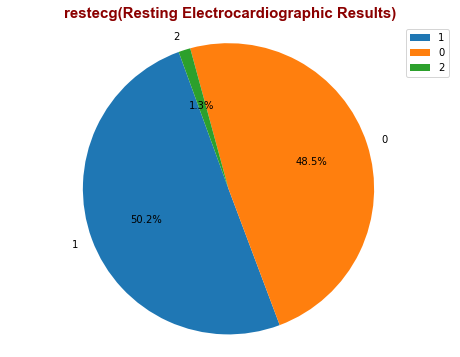

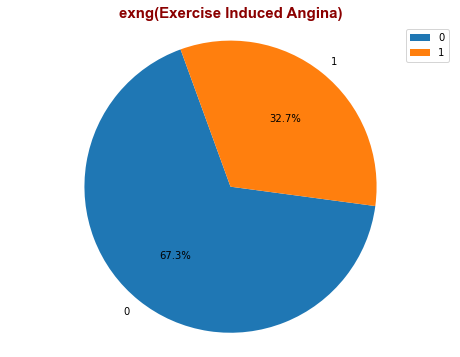

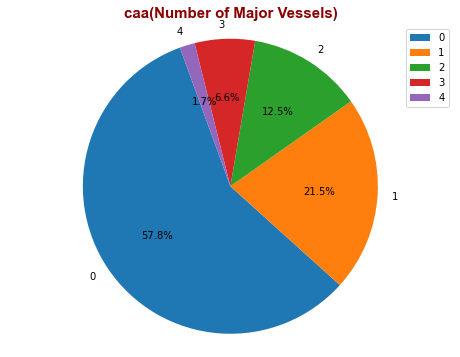

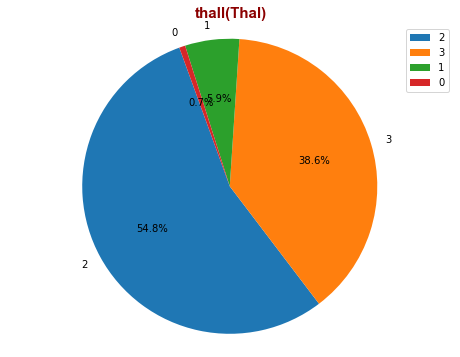

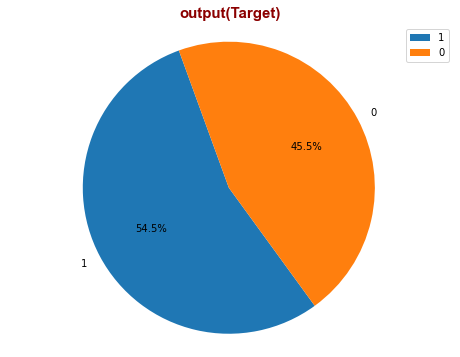

In [19]:
title_style = {"family": "arial", "color": "darkred", "weight": "bold", "size": 15}
axis_style = {"family": "arial", "color": "darkblue", "weight": "bold", "size": 13}

for category, axis_name in list(zip(data_categorical, categoric_axis_name)):
    fig, ax = plt.subplots(figsize=(8, 6))

    values = list(df[category].value_counts().index)
    total_values = list(df[category].value_counts())

    ax.pie(total_values, labels=values, autopct='%1.1f%%', startangle=110, labeldistance=1.1)
    ax.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.title((category + "(" + axis_name + ")"), fontdict=title_style)  # Naming Pie Chart Titles
    plt.legend()
    plt.show()

#### Skewness and Kurtosis

In [63]:
s_k=[]
for i in data_numerical.columns:
    s_k.append([i,data_numerical[i].skew(),data_numerical[i].kurt()])
skew_kurt=pd.DataFrame(s_k,columns=['Columns','Skewness','Kurtosis'])
skew_kurt

Columns  Skewness  Kurtosis
0       age -0.202463 -0.542167
1    trtbps  0.713768  0.929054
2      chol  1.143401  4.505423
3  thalachh -0.537410 -0.061970
4   oldpeak  1.269720  1.575813

### General Rule : 1) If skewness is less than -1 or greater than 1, the distribution is highly skewed. If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed. If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

### 1) Kurtosis is a measure of the combined sizes of the two tails. It measures the amount of probability in the tails. The value is often compared to the kurtosis of the normal distribution, which is equal to 3. If the kurtosis is greater than 3, then the dataset has heavier tails than a normal distribution . If the kurtosis is less than 3, then the dataset has lighter tails than a normal distribution

### Analyis of Numerical Variables with Target

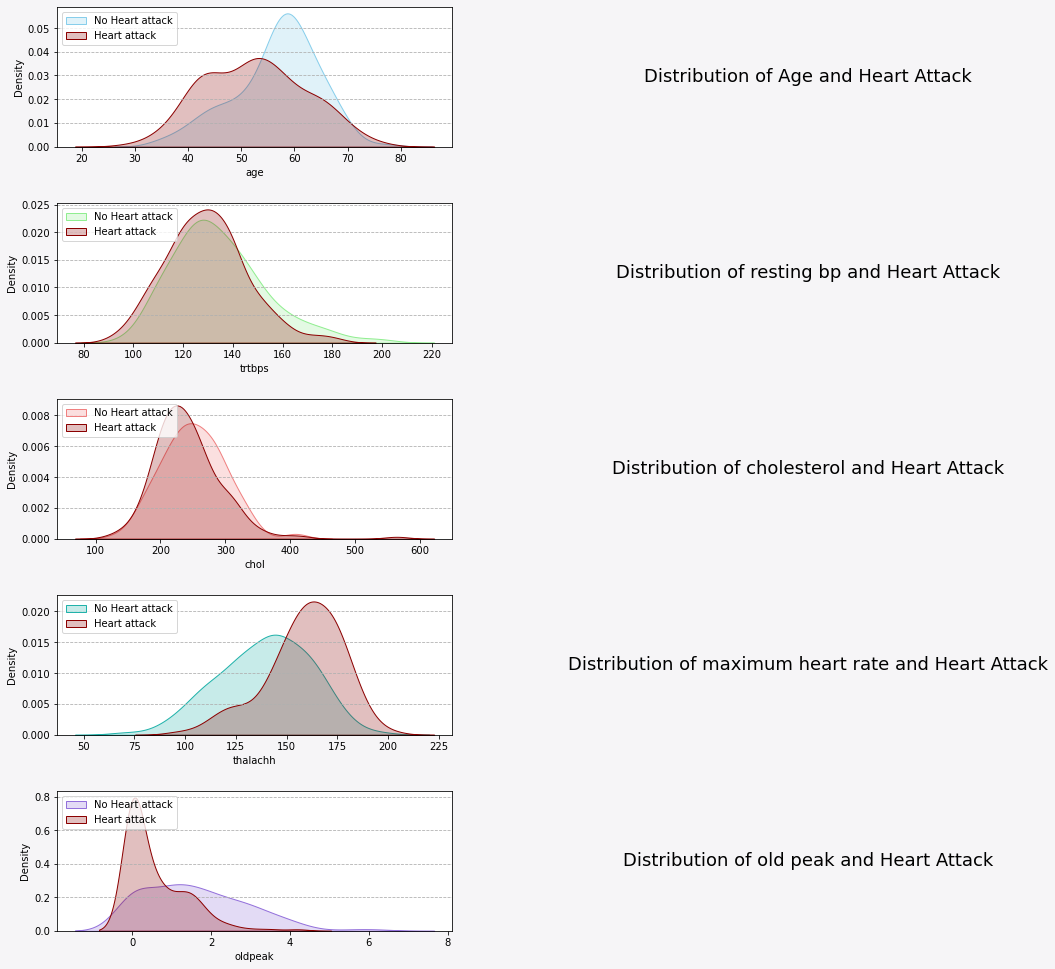

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with a 5x2 grid of subplots
fig, axes = plt.subplots(5, 2, figsize=(17, 17))
fig.patch.set_facecolor('#f6f5f7')

# Create KDE plots for different numerical variables with distinct colors
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightseagreen', 'mediumpurple']
variables = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
labels = ['No Heart attack', 'Heart attack']

for i in range(5):
    sns.kdeplot(x=df.loc[df['output'] == 0][variables[i]], ax=axes[i, 0], color=colors[i], label=labels[0], shade=True)
    sns.kdeplot(x=df.loc[df['output'] == 1][variables[i]], ax=axes[i, 0], color='darkred', label=labels[1], shade=True)
    axes[i, 0].legend(loc='upper left')
    axes[i, 0].grid(linestyle='--', axis='y')

# Add titles to the subplots
titles = ['Distribution of Age and Heart Attack', 'Distribution of resting bp and Heart Attack',
          'Distribution of cholesterol and Heart Attack', 'Distribution of maximum heart rate and Heart Attack',
          'Distribution of old peak and Heart Attack']

for i in range(5):
    axes[i, 1].text(0.5, 0.5, titles[i], horizontalalignment='center', verticalalignment='center', fontsize=18)
    axes[i, 1].axis('off')  # Turn off the second subplot in each row

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.4)

plt.show()

### Bivariate Analysis of Numerical Data

#### The best way to do bivariate analysis of numerical data is to make use of scatterplots

### Age with other numerical data

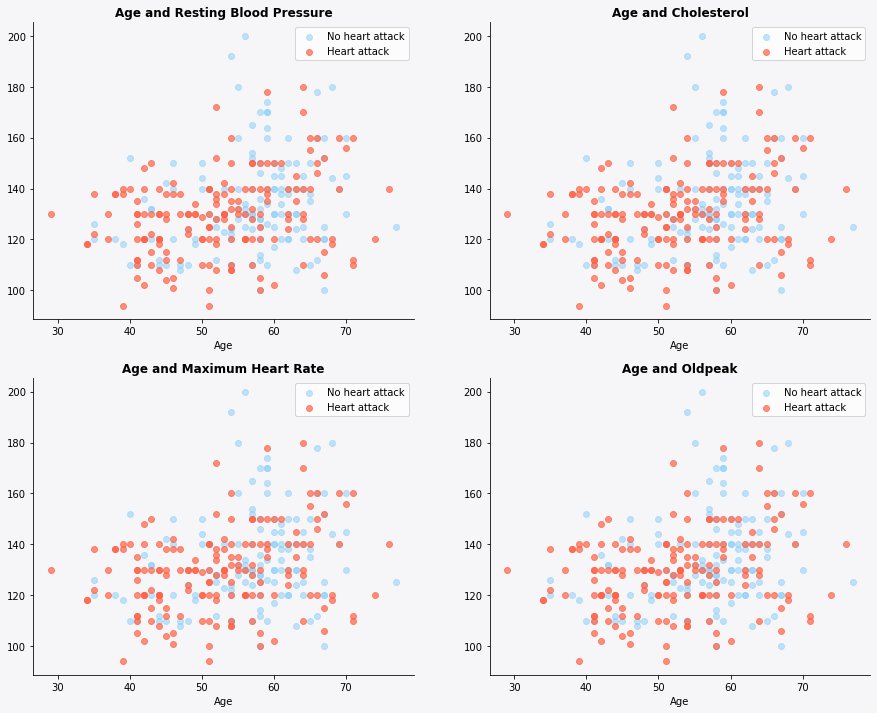

In [24]:
import matplotlib.pyplot as plt

# Creating a 2x2 grid of subplots
fig = plt.figure(figsize=(15, 12))
gs = fig.add_gridspec(2, 2)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
axes = [ax0, ax1, ax2, ax3]

# Setting background color
background_color = '#f6f5f7'
for ax in axes:
    ax.set_facecolor(background_color)
fig.patch.set_facecolor(background_color)

# Scatter plots for Age and Resting bp, Age and Cholesterol, Age and Maximum heart rate, Age and Oldpeak
scatter_data = df[df['output'] == 0]
scatter_color1 = 'lightskyblue'
scatter_data1_label = 'No heart attack'
scatter_data2 = df[df['output'] == 1]
scatter_color2 = 'tomato'
scatter_data2_label = 'Heart attack'

for ax in axes:
    ax.scatter(x='age', y='trtbps', data=scatter_data, alpha=0.5, color=scatter_color1, label=scatter_data1_label)
    ax.scatter(x='age', y='trtbps', data=scatter_data2, color=scatter_color2, alpha=0.7, label=scatter_data2_label)
    ax.legend()
    ax.set_xlabel('Age')
    
ax0.set_title('Age and Resting Blood Pressure', fontweight='bold')
ax1.set_title('Age and Cholesterol', fontweight='bold')
ax2.set_title('Age and Maximum Heart Rate', fontweight='bold')
ax3.set_title('Age and Oldpeak', fontweight='bold')

# Removing spines
for i in ["top", "right"]:
    for ax in axes:
        ax.spines[i].set_visible(False)

plt.show()

#### Observations :
#### 1) People who have resting bp >150 seems to experience lesser heart attacks than people with resting bp <150. There are few outliers here but we can ignore them.

#### 2) No certain relationship between age and cholesterol. The data is spread evenly.

#### 3) People with maximum heart rate above 140 experience more heart attacks than people with heart rate below 140 (significantly lower than people above mhr >140).

#### 4) People with old peak of 0 experience more heart attacks than any other group. This will be cleared in countplots later.

#### 5) One person whose age is less than 30 had a heart attack. Probably an outlier.

### Resting bp with other data
### Not including age as we already saw it in the above figure

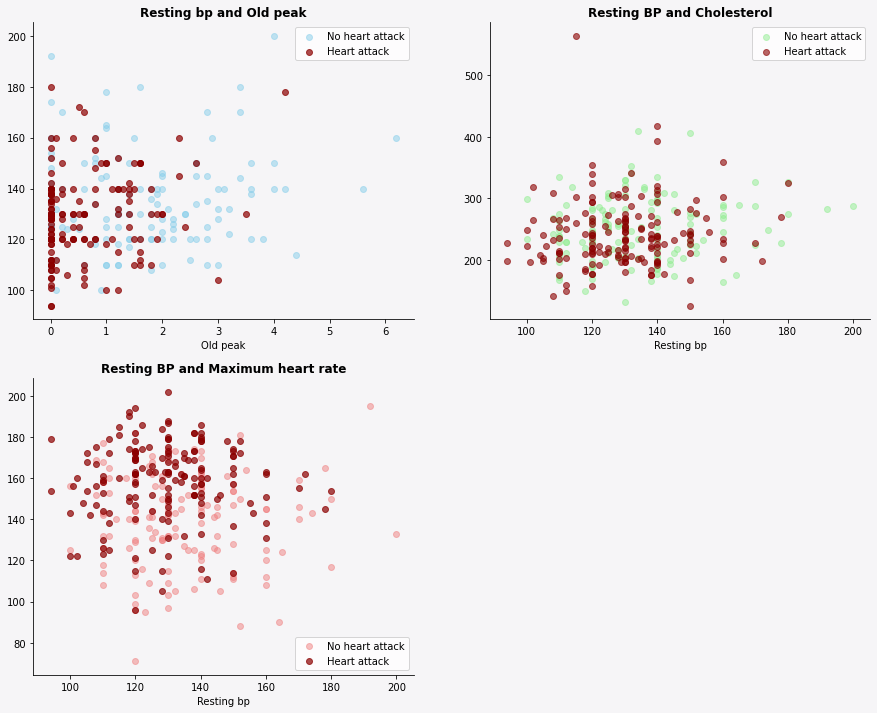

In [30]:
import matplotlib.pyplot as plt

# Create a 2x2 grid of subplots
fig = plt.figure(figsize=(15, 12))
gs = fig.add_gridspec(2, 2)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
axes = [ax0, ax1, ax2, ax3]

# Set the background color for the figure and subplots
background_color = '#f6f5f7'
for ax in axes:
    ax.set_facecolor(background_color)
fig.patch.set_facecolor(background_color)

# Scatter plots for Resting bp and Old peak
ax0.scatter(x=df[df['output'] == 0]['oldpeak'], y=df[df['output'] == 0]['trtbps'],
             alpha=0.5, color='skyblue', label='No heart attack')
ax0.scatter(x=df[df['output'] == 1]['oldpeak'], y=df[df['output'] == 1]['trtbps'],
             color='darkred', alpha=0.7, label='Heart attack')
ax0.set_xlabel('Old peak')
ax0.legend()
ax0.set_title('Resting bp and Old peak', fontweight='bold')

# Scatter plots for Resting BP and Cholesterol
ax1.scatter(x=df[df['output'] == 0]['trtbps'], y=df[df['output'] == 0]['chol'],
             alpha=0.5, color='lightgreen', label='No heart attack')
ax1.scatter(x=df[df['output'] == 1]['trtbps'], y=df[df['output'] == 1]['chol'],
             color='darkred', alpha=0.6, label='Heart attack')
ax1.set_xlabel('Resting bp')
ax1.legend()
ax1.set_title('Resting BP and Cholesterol', fontweight='bold')

# Scatter plots for Resting BP and Maximum heart rate
ax2.scatter(x=df[df['output'] == 0]['trtbps'], y=df[df['output'] == 0]['thalachh'],
             alpha=0.5, color='lightcoral', label='No heart attack')
ax2.scatter(x=df[df['output'] == 1]['trtbps'], y=df[df['output'] == 1]['thalachh'],
             color='darkred', alpha=0.7, label='Heart attack')
ax2.set_xlabel('Resting bp')
ax2.legend()
ax2.set_title('Resting BP and Maximum heart rate', fontweight='bold')

# Remove spines
for ax in axes:
    for i in ["top", "right"]:
        ax.spines[i].set_visible(False)

# Hide the last subplot
ax3.set_visible(False)

plt.show()

#### Observations :
#### 1) People with oldpeak(ST depression induced by exercise relative to rest) of 0 experience more heart attacks than others. We can see the same wrt age in the above figures.

#### 2) People with resting bp above 150 seems to experience less heart attack than others (fewer data here). Resting bp between 120-140 and cholesterol levels 200-270 shows more heart attacks.

#### 3) People with maximum heart rate above 140 experience more heart attacks than others. We can see the same with age in the above figures

## Maximum heart rate with other data

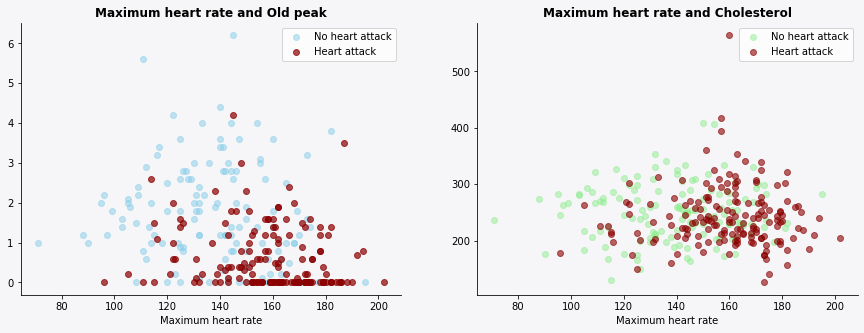

In [32]:
import matplotlib.pyplot as plt

# Create a figure with a 1x2 grid of subplots
fig = plt.figure(figsize=(15, 5))
gs = fig.add_gridspec(1, 2)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
axes = [ax0, ax1]

# Set the background color for the figure and subplots
background_color = '#f6f5f7'
for ax in axes:
    ax.set_facecolor(background_color)
fig.patch.set_facecolor(background_color)

# Scatter plot for Maximum heart rate and Old peak
ax0.scatter(x='thalachh', y='oldpeak', data=df[df['output'] == 0], alpha=0.5, color='skyblue', label='No heart attack')
ax0.scatter(x='thalachh', y='oldpeak', data=df[df['output'] == 1], color='darkred', alpha=0.7, label='Heart attack')
ax0.set_xlabel('Maximum heart rate')
ax0.legend()
ax0.set_title('Maximum heart rate and Old peak', fontweight='bold')

# Scatter plot for Maximum heart rate and Cholesterol
ax1.scatter(x='thalachh', y='chol', data=df[df['output'] == 0], alpha=0.5, color='lightgreen', label='No heart attack')
ax1.scatter(x='thalachh', y='chol', data=df[df['output'] == 1], color='darkred', alpha=0.6, label='Heart attack')
ax1.set_xlabel('Maximum heart rate')
ax1.legend()
ax1.set_title('Maximum heart rate and Cholesterol', fontweight='bold')

# Remove spines
for ax in axes:
    for i in ["top", "right"]:
        ax.spines[i].set_visible(False)

plt.show()

## Correlation plot for numerical variables

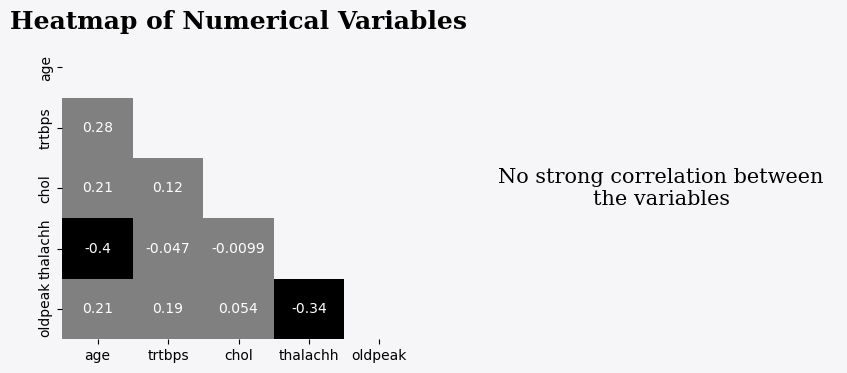

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create a figure with a 1x2 grid of subplots
fig = plt.figure(figsize=(10, 4), dpi=100)
gs = fig.add_gridspec(1, 2)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
axes = [ax0, ax1]

# Set the background color for the figure and subplots
background_color = '#f6f5f7'
for ax in axes:
    ax.set_facecolor(background_color)
fig.patch.set_facecolor(background_color)

# Create a heatmap of numerical data with distinct colors
matrix = np.triu(data_numerical.corr())
colors = ['black', 'grey']
sns.heatmap(ax=ax0, data=data_numerical.corr(), annot=True, mask=matrix, cmap=colors, cbar=False)
ax0.set_title('Heatmap of Numerical Variables', fontsize=18, fontweight='bold', fontfamily='serif')

# Add text to the second subplot
ax1.text(0.5, 0.5, 'No strong correlation between\nthe variables', horizontalalignment='center',
         verticalalignment='center', fontsize=15, fontfamily='serif')
ax1.spines["bottom"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.tick_params(left=False, bottom=False)

# Remove spines from the second subplot
for i in ["top", "right", "bottom", "left"]:
    ax1.spines[i].set_visible(False)

plt.show()

#### Observations :
#### 1) Chol and Oldpeak has the highest corelation between the features.

#### 2) Negative correlation between cholesterol and thalach , age and thalach , thalach and old peak. So we can ignore any chance of multi collinearity.

### Pairplot

<Figure size 2000x1500 with 0 Axes>

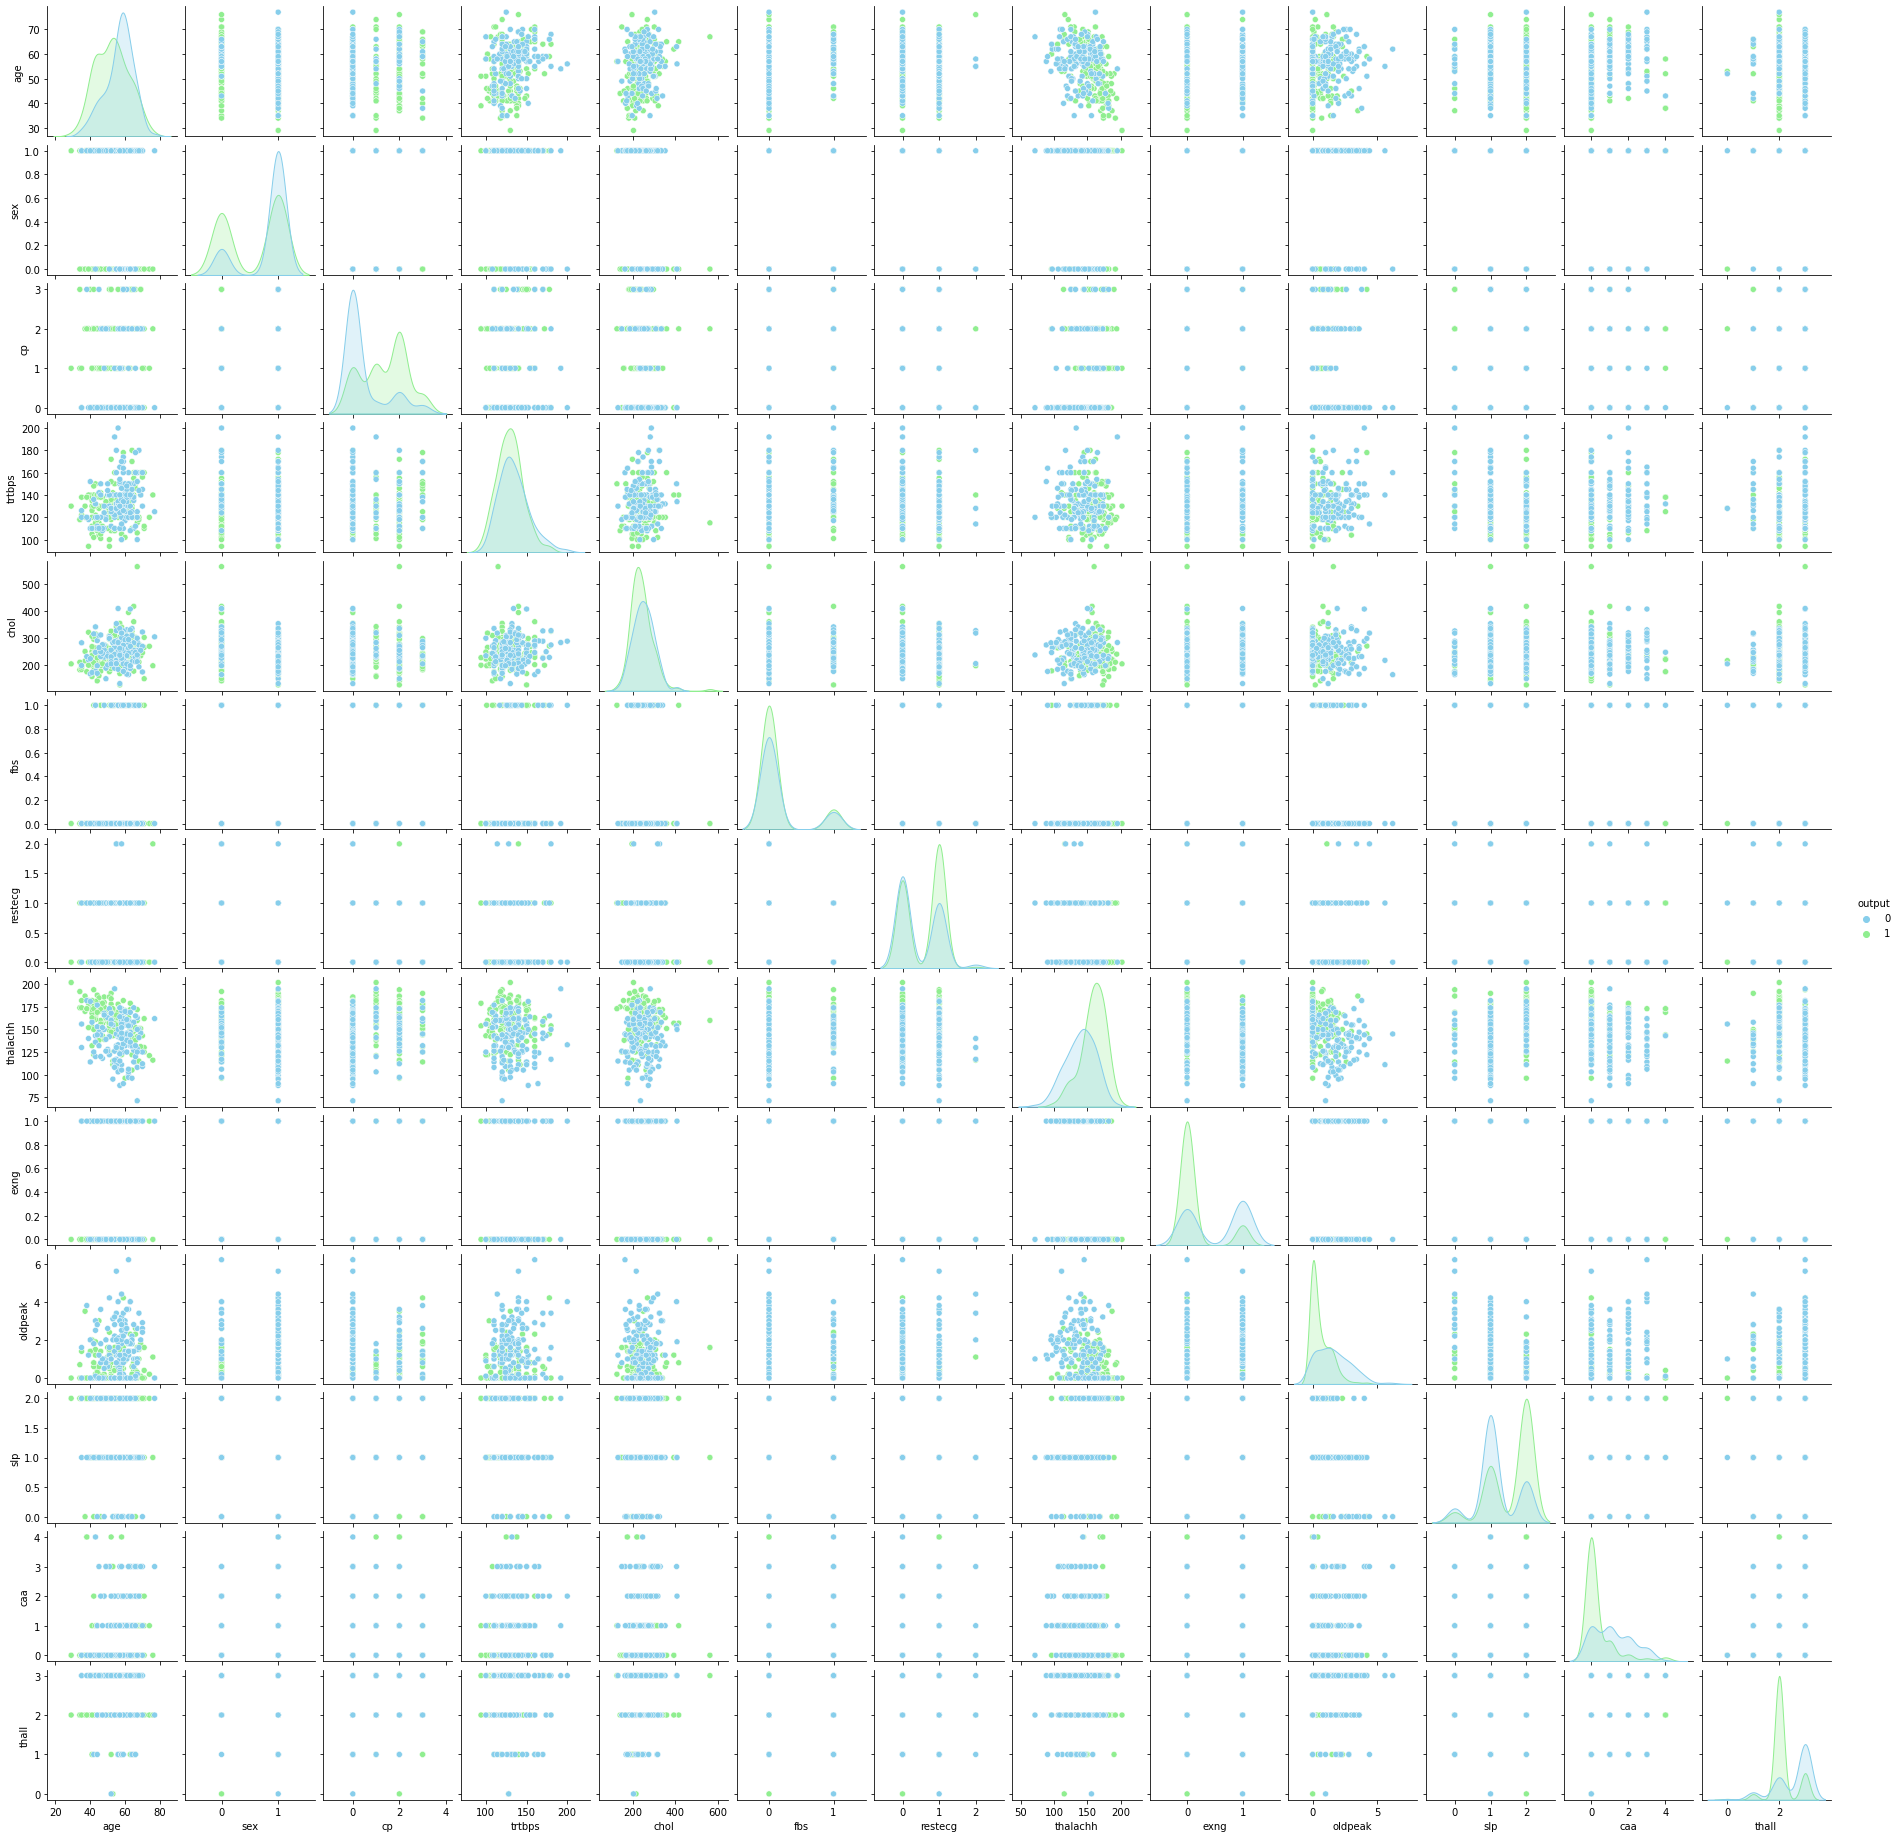

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with the desired size and DPI
fig = plt.figure(figsize=(20, 15), dpi=100)

# Define custom colors for the pairplot
colors = ['skyblue', 'lightgreen']

# Create the pairplot with custom colors
sns.pairplot(data=df, hue='output', height=2, palette=colors)

# Display the pairplot
plt.show()

## Univariate Analysis of Categorical Variables

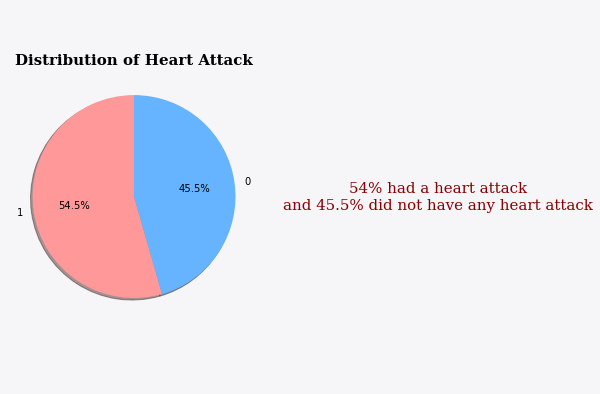

In [40]:
import matplotlib.pyplot as plt

# Custom colors for the pie chart
colors = ['#ff9999', '#66b3ff']

# Create a figure with a 1x2 grid of subplots
fig = plt.figure(figsize=(10, 7))
gs = fig.add_gridspec(1, 2)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
axes = [ax0, ax1]

# Set the background color for the figure and subplots
background_color = '#f6f5f7'
for ax in axes:
    ax.set_facecolor(background_color)
    for i in ["top", "right", "bottom", "left"]:
        ax.spines[i].set_visible(False)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.tick_params(left=False, bottom=False)
fig.patch.set_facecolor(background_color)

# Data for the pie chart
labels = data_categorical['output'].value_counts().index
values = data_categorical['output'].value_counts()

# Create a pie chart with custom colors
ax0.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax0.set_title('Distribution of Heart Attack', fontsize=15, fontweight='bold', fontfamily='serif')

# Add text to the second subplot with different colors
ax1.text(0.5, 0.5, '54% had a heart attack\nand 45.5% did not have any heart attack',
         horizontalalignment='center', verticalalignment='center', fontsize=15, fontfamily='serif', color='darkred')

# Remove spines from the second subplot
for i in ["top", "right", "bottom", "left"]:
    ax1.spines[i].set_visible(False)

plt.show()

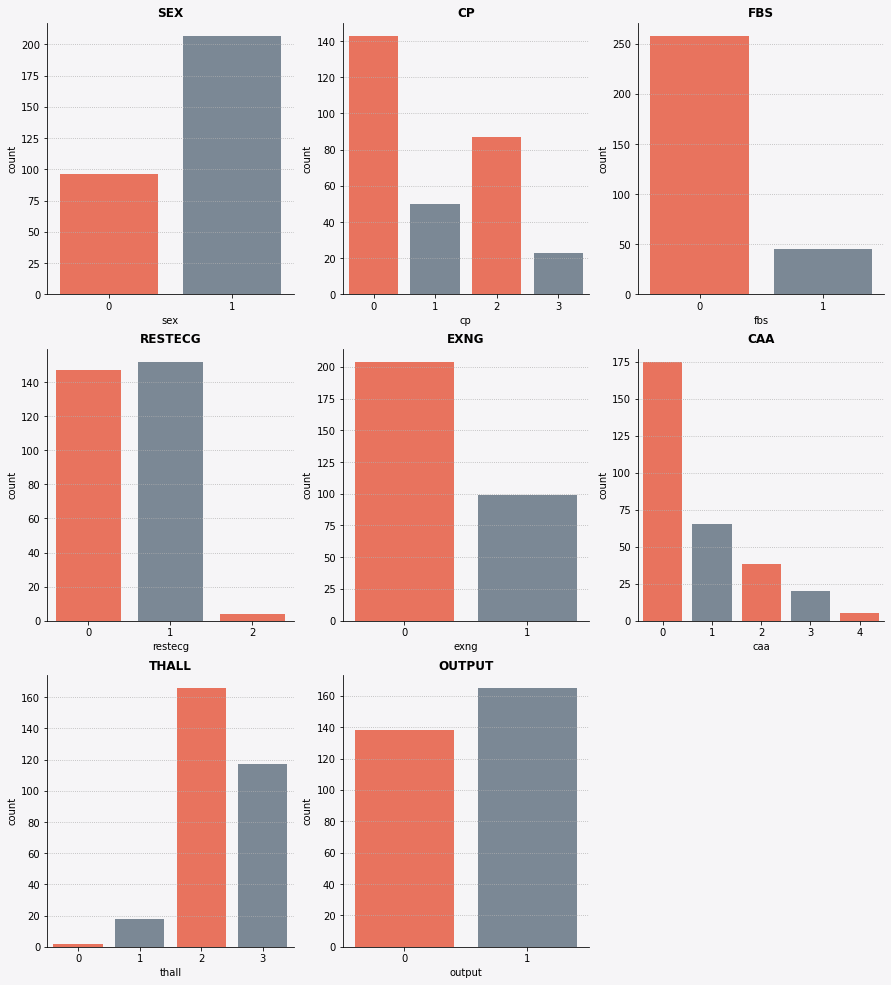

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Custom colors for the countplots
colors = ['#ff6347', 'lightslategrey']

# Create a figure with the desired size
fig = plt.figure(figsize=(15, 23))

# Set the background color for the figure
background_color = '#f6f5f7'
fig.patch.set_facecolor(background_color)

# Iterate through the categorical columns
for indx, val in enumerate(data_categorical.columns):
    ax = plt.subplot(4, 3, indx + 1)
    ax.set_facecolor(background_color)
    ax.set_title(val.upper(), fontweight='bold')

    # Remove top and right spines, add a horizontal grid
    for i in ['top', 'right']:
        ax.spines[i].set_visible(False)
    ax.grid(linestyle=':', axis='y')

    # Create countplot with custom colors
    sns.countplot(data_categorical[val], palette=colors)

plt.show()

#### Observations :
#### 1) Sex : The number of males are way more than the number of females in our data (male=1 , female = 0).

#### 2) CP: People with type 0 chest pain (typical angina) are way more in number than the other groups. Type 3 cp (asymptomatic) are in the least ammount.

#### 3) FBS: People with fasting blood sugar <120 are greater in number than people with blood sugar levels>120.

#### 4) RESECG : 0 ( normal) and 1(having ST-T wave abnormality) are almost equal in number. This will be useful for predicting heart attack. Type 2 is almost negligible.

#### 5) EXANG : People without exang (0) are almost double the amount of people with exang.

#### 6) CA : People with blood vessels 0 occupy most amount of our data. More number of heart attacks were observed when CA=0 (previous analysis) .

#### 7) THAL : People with thal 2 are more in number. No information was given about this(may not include this in predictions).

### Analysis with output

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select specific categorical columns
data_cat = df_cat[['DClassification', 'TypeOfPatient', 'RiskGroup', 'Referral',
       'Contacts >4 yrs Screened', 'Contacts >4 yrs with TB',
       'Contacts >4 yrs on IPT', 'Contacts <5 yrs Screened',
       'Contacts <5 yrs with TB', 'Contacts <5 yrs on IPT', 'HIVTest',
       'CPTGiven', 'ART_Status', 'DOT', 'Lab_diagnosis',
       'Intensive_Monitoring', 'Continuous _Monitoring']]

# Custom colors for the countplots
colors = ['blue', 'red']

# Create a figure with a larger size to accommodate all plots
fig = plt.figure(figsize=(15, 30))

# Set the background color for the figure
background_color = '#f6f5f7'
fig.patch.set_facecolor(background_color)

# Define the number of rows and columns based on the number of columns
num_rows = len(data_cat.columns) // 2 + len(data_cat.columns) % 2
num_cols = 2

# Iterate through the selected categorical columns
for indx, val in enumerate(data_cat.columns):
    ax = fig.add_subplot(num_rows, num_cols, indx + 1)
    ax.set_facecolor(background_color)
    ax.set_title(val.upper(), fontweight='bold', fontfamily='serif')

    # Remove top and right spines, add a horizontal grid
    for i in ['top', 'right']:
        ax.spines[i].set_visible(False)
    ax.grid(axis='y', linestyle=':')

    # Create countplot with custom colors and hue
    sns.countplot(x=val, data=data_cat, palette=colors, hue=df['output'])

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()

NameError: name 'df_cat' is not defined

#### Observations :
#### 1) Sex: Men experience more heart attacks than women.

#### 2) CP : People with type 2 chest pain(atypical angina) are more prone to heart attacks than any other type of chest pain (only few with type 2 pain did not get heart attack).

#### 3) FBS : People with fasting blood sugar < 120 experienced more heart attacks. Will have to look at this again.

#### 4) RESTECG :People with type 1 restecg(having ST-T wave abnormality) experienced the highest heart attacks (this is expected). Surprisingly, people with normal restecg also experiencecd heart attacks a lot. Type 2 restesg can be ignored.

#### 5) EXANG: People with exercise induced angina are more prone to heart attacks.

#### 6) CA : People with 0 number of major blood vessels experienced the highest amount of heart attacks (expected) .

#### Looking at few categorical variables closely

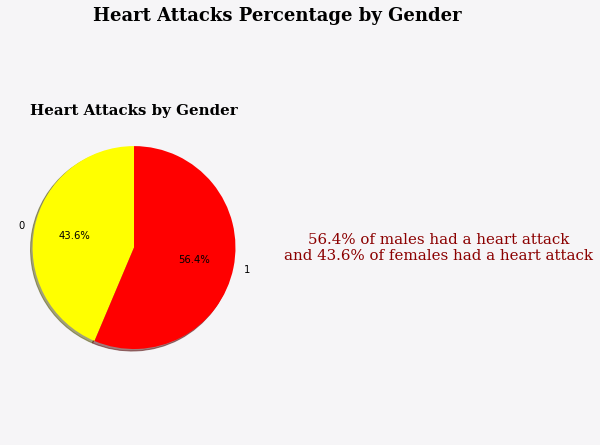

In [52]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the sum of 'output' values where it equals 1
sum_target = df['output'].sum()

# Create a pivot table for sex and calculate the percentage of heart attacks
data_sex = pd.pivot_table(data=df[df['output'] == 1], index=df['sex'], values='output', aggfunc='count').reset_index()
data_sex['percentage'] = (data_sex['output'] * 100) / sum_target

# Custom colors for the pie chart
colors = ['yellow', 'red']

# Create a figure with a 1x2 grid of subplots
fig = plt.figure(figsize=(10, 7))
gs = fig.add_gridspec(1, 2)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
axes = [ax0, ax1]

# Set the background color for the figure and subplots
background_color = '#f6f5f7'
for ax in axes:
    ax.set_facecolor(background_color)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_xticklabels([])
    ax.set_yticklabels([])

fig.patch.set_facecolor(background_color)

# Data for the pie chart
labels = data_sex['sex']
values = data_sex['percentage']

# Create a pie chart with custom colors
ax0.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax0.set_title('Heart Attacks by Gender', fontsize=15, fontweight='bold', fontfamily='serif')

# Add text to the second subplot with different colors
ax1.text(0.5, 0.5, '56.4% of males had a heart attack\nand 43.6% of females had a heart attack',
         horizontalalignment='center', verticalalignment='center', fontsize=15, fontfamily='serif', color='darkred')

# Remove spines from the second subplot
for i in ["top", "right", "bottom", "left"]:
    ax1.spines[i].set_visible(False)
ax1.tick_params(left=False, bottom=False)

# Add a title to the entire figure
plt.suptitle('Heart Attacks Percentage by Gender', fontsize=18, fontweight='bold', fontfamily='serif')

plt.show()

### Fasting Blood Sugar(fasting blood sugar > 120 mg/dl (1 = true; 0 = false))

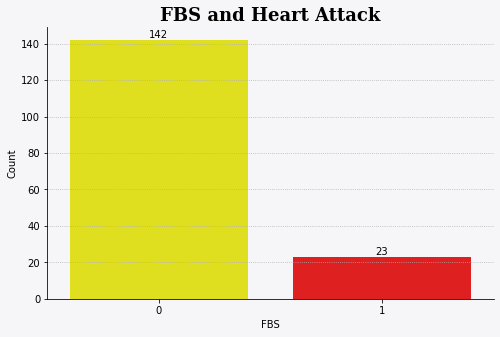

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a pivot table for 'fbs' and count the heart attacks
data_fbs = pd.pivot_table(data=df[df['output'] == 1], index=df['fbs'], values='output', aggfunc='count').reset_index()

# Custom colors for the barplot
colors = ['yellow', 'red']

# Create a figure and axes
fig, axes = plt.subplots(1, 1, figsize=(8, 5))

# Set the background color for the figure and axes
background_color = '#f6f5f7'
fig.patch.set_facecolor(background_color)
axes.set_facecolor(background_color)

# Create a barplot
sns.barplot(ax=axes, x=data_fbs['fbs'], y=data_fbs['output'], palette=colors)

# Annotate the bar heights
for idx, val in enumerate(data_fbs['output']):
    axes.text(idx, val + 1, round(val, 1), horizontalalignment='center')

# Add a horizontal grid
axes.grid(linestyle=':', axis='y')

# Set labels for the axes
axes.set_xlabel('FBS')
axes.set_ylabel('Count')

# Add a title to the plot
plt.title('FBS and Heart Attack', fontsize=18, fontweight='bold', fontfamily='serif')

# Remove top and right spines
for i in ['top', 'right']:
    axes.spines[i].set_visible(False)

plt.show()

### Chest pain and Heart attack(chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 0 = asymptomatic))

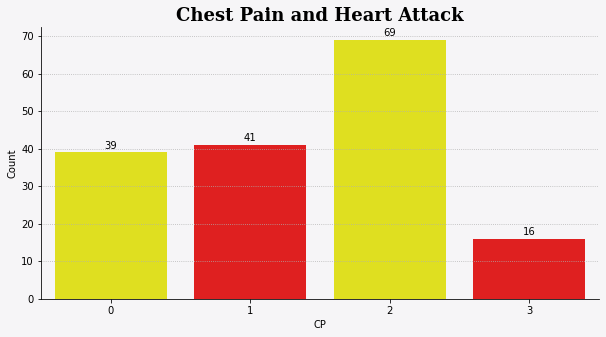

In [57]:


# Create a pivot table for 'cp' and count the heart attacks
data_cp = pd.pivot_table(data=df[df['output'] == 1], index=df['cp'], values='output', aggfunc='count').reset_index()

# Custom colors for the barplot
colors = ['yellow', 'red']

# Create a figure and axes
fig, axes = plt.subplots(1, 1, figsize=(10, 5))

# Set the background color for the figure and axes
background_color = '#f6f5f7'
fig.patch.set_facecolor(background_color)
axes.set_facecolor(background_color)

# Create a barplot
sns.barplot(ax=axes, x=data_cp['cp'], y=data_cp['output'], palette=colors)

# Annotate the bar heights
for idx, val in enumerate(data_cp['output']):
    axes.text(idx, val + 1, round(val, 1), horizontalalignment='center')

# Add a horizontal grid
axes.grid(linestyle=':', axis='y')

# Set labels for the axes
axes.set_xlabel('CP')
axes.set_ylabel('Count')

# Add a title to the plot
plt.title('Chest Pain and Heart Attack', fontsize=18, fontweight='bold', fontfamily='serif')

# Remove top and right spines
for i in ['top', 'right']:
    axes.spines[i].set_visible(False)

plt.show()

### Checking for outliers

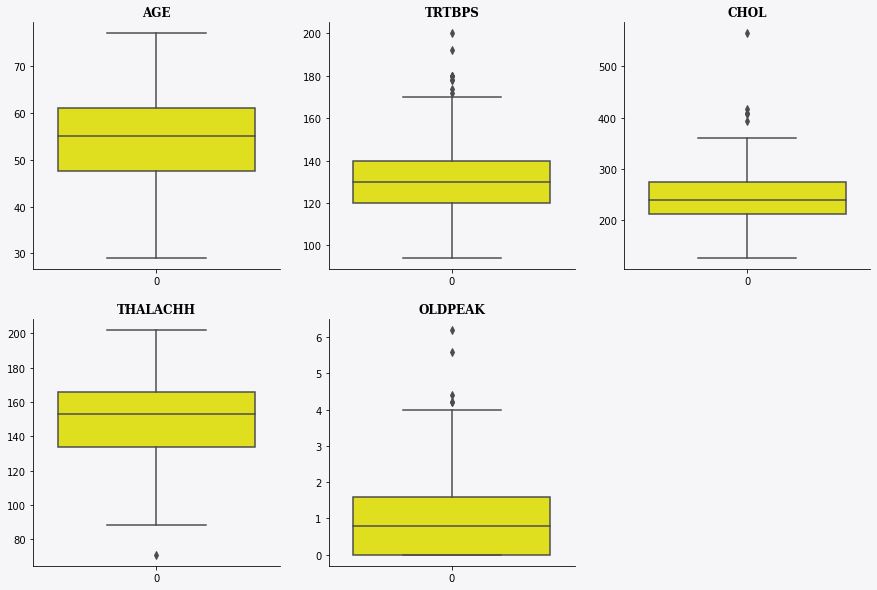

In [58]:


# Custom colors for the boxplots
colors = ['yellow', 'red']

# Create a figure with a 2x3 grid of subplots
plt.figure(figsize=(15, 10))
background_color = '#f6f5f7'
plt.gcf().patch.set_facecolor(background_color)

for idx, val in enumerate(data_numerical.columns):
    ax = plt.subplot(2, 3, idx + 1)
    sns.boxplot(data=data_numerical[val], palette=colors)
    ax.set_facecolor(background_color)
    ax.set_title(val.upper(), fontweight='bold', fontfamily='serif')

    for i in ['top', 'right']:
        ax.spines[i].set_visible(False)

plt.show()

#####  Cholesterol , Old peak , Resting bp have outliers. We shall standardize our data (standardizing the Train and Test set) so we can ignore them.

#### One-Hot encoding of Categorical Variables

In [11]:

data_dummies=df[['sex','cp','fbs','restecg','exng','caa','thall']]
data_dummies= pd.get_dummies(data_dummies,columns=['sex','cp','fbs','restecg','exng','caa','thall'])

####  Merging the dummy variables and our original data

In [12]:

df.drop(columns=['sex','cp','fbs','restecg','exng','caa','thall'],inplace=True)
data=df.merge(data_dummies,left_index=True, right_index=True,how='left')
data.head()

age  trtbps  chol  thalachh  oldpeak  output  sex_0  sex_1  cp_0  cp_1  \
0   63     145   233       150      2.3       1      0      1     0     0   
1   37     130   250       187      3.5       1      0      1     0     0   
2   41     130   204       172      1.4       1      1      0     0     1   
3   56     120   236       178      0.8       1      0      1     0     1   
4   57     120   354       163      0.6       1      1      0     1     0   

   ...  exng_1  caa_0  caa_1  caa_2  caa_3  caa_4  thall_0  thall_1  thall_2  \
0  ...       0      1      0      0      0      0        0        1        0   
1  ...       0      1      0      0      0      0        0        0        1   
2  ...       0      1      0      0      0      0        0        0        1   
3  ...       0      1      0      0      0      0        0        0        1   
4  ...       1      1      0      0      0      0        0        0        1   

   thall_3  
0        0  
1        0  
2        0  
3        0  
4        0  

[5 rows x 28 columns]

# Modeling

#### # Splitting the data into training and testing sets.

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [23]:
x = data.drop('output', axis=1)
y = data['output']

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

####  Standardizing the training and testing data.to handle outliers

In [25]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [26]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [27]:
y_pred = model.predict(x_test)

In [28]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.85


In [20]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# SVM

In [21]:
# instantiating the object and fitting
x = data.drop('output', axis=1)
y = data['output']

clf = SVC(kernel='linear', C=1, random_state=42).fit(x_train,y_train)

# predicting the values
y_pred = clf.predict(x_test)

# printing the test accuracy
print("The test accuracy score of SVM is ", accuracy_score(y_test, y_pred))

The test accuracy score of SVM is  0.9016393442622951


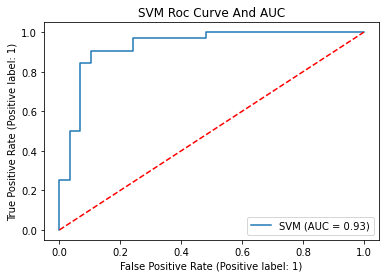

In [77]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf, x_test, y_test, name = "SVM")
plt.title("SVM Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()

In [77]:
from sklearn.model_selection import GridSearchCV
# instantiating the object
svm = SVC()

# setting a grid - not so extensive
parameters = {"C":np.arange(1,10,1),'gamma':[0.00001,0.00005, 0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,5]}

# instantiating the GridSearchCV object
searcher = GridSearchCV(svm, parameters)

# fitting the object
searcher.fit(x_train, y_train)

# the scores
print("The best params are :", searcher.best_params_)
print("The best score is   :", searcher.best_score_)

# predicting the values
y_pred = searcher.predict(x_test)

# printing the test accuracy
print("The test accuracy score of SVM after hyper-parameter tuning is ", accuracy_score(y_test, y_pred))

The best params are : {'C': 1, 'gamma': 0.01}
The best score is   : 0.8430272108843537
The test accuracy score of SVM after hyper-parameter tuning is  0.8524590163934426


## Cross validation for SVM

In [75]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, x_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.7404761904761904


In [79]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [80]:
x = data.drop('output', axis=1)
y = data['output']

In [81]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [82]:
key = ['LogisticRegression','KNeighborsClassifier','SVC','DecisionTreeClassifier','GradientBoostingClassifier']
value = [LogisticRegression(random_state=9), KNeighborsClassifier(), SVC(), DecisionTreeClassifier(),GradientBoostingClassifier()]
models = dict(zip(key,value))

In [83]:
predicted =[]

In [84]:
for name,algo in models.items():
    model4=algo
    model4.fit(x_train,y_train)
    predict = model4.predict(x_test)
    acc = accuracy_score(y_test, predict)
    predicted.append(acc)
    print(name,acc)

LogisticRegression 0.8351648351648352
KNeighborsClassifier 0.6593406593406593
SVC 0.6923076923076923
DecisionTreeClassifier 0.8021978021978022
GradientBoostingClassifier 0.8241758241758241


### Adaboost

In [99]:
x = data.drop('output', axis=1)
y = data['output']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)
ada_pre=ada.predict(x_test)
acc_ada = accuracy_score(y_test,ada_pre)
acc_ada

0.8241758241758241

## Model Evaluation 

### light boost

In [105]:
import lightgbm as lgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X = data.drop('output', axis=1)
y = data['output']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


train_data = lgb.Dataset(x_train, label=y_train)

params = {
    "objective": "binary",
    "metric": "binary_logloss",
    "boosting_type": "gbdt",
    "num_leaves": 31,
    "learning_rate": 0.05,
    "feature_fraction": 0.9
}


num_round = 100
bst = lgb.train(params, train_data, num_round)


y_pred = bst.predict(x_test)


y_pred_binary = [1 if x >= 0.5 else 0 for x in y_pred]


accuracy = accuracy_score(y_test, y_pred_binary)

print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, y_pred_binary))

[LightGBM] [Info] Number of positive: 133, number of negative: 109
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000177 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 245
[LightGBM] [Info] Number of data points in the train set: 242, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.549587 -> initscore=0.199001
[LightGBM] [Info] Start training from score 0.199001
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

In [76]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# SVM
x = data.drop('output', axis=1)
y = data['output']

# Instantiate and fit the SVM model
clf_svm = SVC(kernel='linear', C=1, random_state=42).fit(x_train, y_train)

# Predict the values
y_pred_svm = clf_svm.predict(x_test)

# Print the test accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Model Performance Metrics:")
print("Test Accuracy:", accuracy_svm)

# Additional Metrics for SVM
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)

# Confusion Matrix for SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("\nConfusion Matrix for SVM:")
print(conf_matrix_svm)

# Classification Report for SVM
class_report_svm = classification_report(y_test, y_pred_svm)
print("\nClassification Report for SVM:")
print(class_report_svm)

# RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)

# Predict the values
y_pred_rf = model_rf.predict(x_test)

# Print the test accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("\nRandomForestClassifier Model Performance Metrics:")
print("Test Accuracy:", accuracy_rf)

# Additional Metrics for RandomForestClassifier
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

# Confusion Matrix for RandomForestClassifier
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix for RandomForestClassifier:")
print(conf_matrix_rf)

# Classification Report for RandomForestClassifier
class_report_rf = classification_report(y_test, y_pred_rf)
print("\nClassification Report for RandomForestClassifier:")
print(class_report_rf)

SVM Model Performance Metrics:
Test Accuracy: 0.9016393442622951

Confusion Matrix for SVM:
[[26  3]
 [ 3 29]]

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61


RandomForestClassifier Model Performance Metrics:
Test Accuracy: 0.8524590163934426

Confusion Matrix for RandomForestClassifier:
[[25  4]
 [ 5 27]]

Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



### Model Performance Metrics

In [78]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# SVM
x = data.drop('output', axis=1)
y = data['output']

# Instantiate and fit the SVM model
clf_svm = SVC(kernel='linear', C=1, random_state=42).fit(x_train, y_train)

# Predict the values
y_pred_svm = clf_svm.predict(x_test)

# Print the test accuracy
print("The test accuracy score of SVM is ", accuracy_score(y_test, y_pred_svm))

# Cross-validation for SVM
cv_svm = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_svm = cross_val_score(clf_svm, x, y, cv=cv_svm, scoring='accuracy')
print("SVM Cross-Validation Accuracy Scores", cv_scores_svm)

# RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)

# Predict the values
y_pred_rf = model_rf.predict(x_test)

# Print the test accuracy
print("\nAccuracy for RandomForestClassifier:", accuracy_score(y_test, y_pred_rf))

# Cross-validation for RandomForestClassifier
cv_rf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_rf = cross_val_score(model_rf, x, y, cv=cv_rf, scoring='accuracy')
print("RandomForestClassifier Cross-Validation Accuracy Scores", cv_scores_rf)

The test accuracy score of SVM is  0.9016393442622951
SVM Cross-Validation Accuracy Scores [0.90163934 0.85245902 0.73770492 0.85       0.83333333]

Accuracy for RandomForestClassifier: 0.8524590163934426
RandomForestClassifier Cross-Validation Accuracy Scores [0.91803279 0.78688525 0.73770492 0.85       0.86666667]


### Model complexity

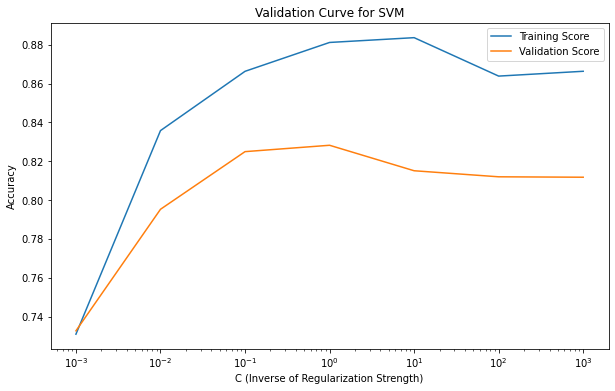

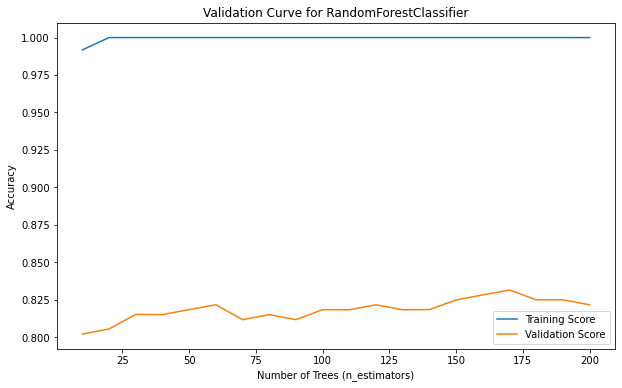

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve

# Assuming you have your data loaded into x and y
# Assuming you have your x_train, x_test, y_train, and y_test

# SVM
param_range = np.logspace(-3, 3, 7)  # Vary C from 0.001 to 1000
train_scores, test_scores = validation_curve(
    SVC(kernel='linear', random_state=42),
    x, y, param_name="C", param_range=param_range,
    cv=5, scoring="accuracy", n_jobs=-1
)

# Plot validation curve for SVM
plt.figure(figsize=(10, 6))
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Validation Score')
plt.xscale('log')
plt.xlabel('C (Inverse of Regularization Strength)')
plt.ylabel('Accuracy')
plt.title('Validation Curve for SVM')
plt.legend()
plt.show()

# RandomForestClassifier
# Adjust hyperparameters as needed
param_range_rf = np.arange(10, 210, 10)  # Vary the number of trees
train_scores_rf, test_scores_rf = validation_curve(
    RandomForestClassifier(random_state=42),
    x, y, param_name="n_estimators", param_range=param_range_rf,
    cv=5, scoring="accuracy", n_jobs=-1
)

# Plot validation curve for RandomForestClassifier
plt.figure(figsize=(10, 6))
plt.plot(param_range_rf, np.mean(train_scores_rf, axis=1), label='Training Score')
plt.plot(param_range_rf, np.mean(test_scores_rf, axis=1), label='Validation Score')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.title('Validation Curve for RandomForestClassifier')
plt.legend()
plt.show()

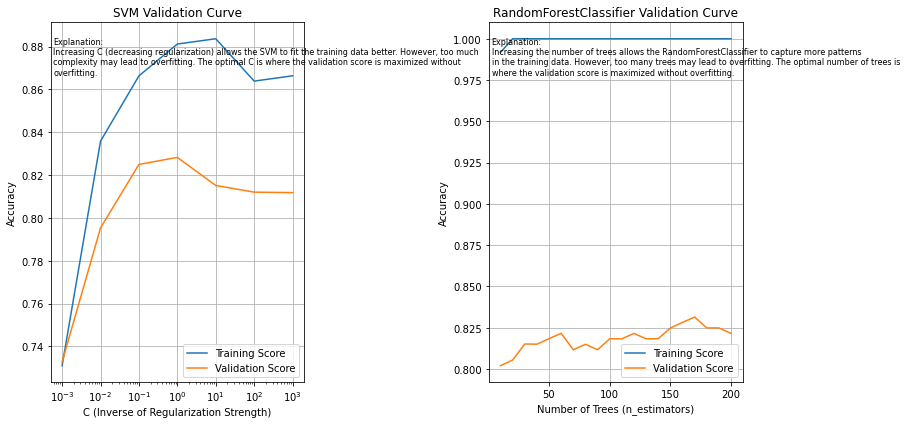

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have your data loaded into x and y
# Assuming you have your x_train, x_test, y_train, and y_test

# SVM Validation Curve
param_range_svm = np.logspace(-3, 3, 7)  # Vary C from 0.001 to 1000
train_scores_svm, test_scores_svm = validation_curve(
    SVC(kernel='linear', random_state=42),
    x, y, param_name="C", param_range=param_range_svm,
    cv=5, scoring="accuracy", n_jobs=-1
)

# Plot SVM Validation Curve
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(param_range_svm, np.mean(train_scores_svm, axis=1), label='Training Score')
plt.plot(param_range_svm, np.mean(test_scores_svm, axis=1), label='Validation Score')
plt.xscale('log')
plt.xlabel('C (Inverse of Regularization Strength)')
plt.ylabel('Accuracy')
plt.title('SVM Validation Curve')
plt.legend()
plt.grid(True)
plt.text(0.01, 0.96, 'Explanation:\nIncreasing C (decreasing regularization) allows the SVM to fit the training data better. However, too much\ncomplexity may lead to overfitting. The optimal C is where the validation score is maximized without\noverfitting.', fontsize=8, ha='left', va='top', transform=plt.gca().transAxes)

# RandomForestClassifier Validation Curve
param_range_rf = np.arange(10, 210, 10)  # Vary the number of trees
train_scores_rf, test_scores_rf = validation_curve(
    RandomForestClassifier(random_state=42),
    x, y, param_name="n_estimators", param_range=param_range_rf,
    cv=5, scoring="accuracy", n_jobs=-1
)

# Plot RandomForestClassifier Validation Curve
plt.subplot(1, 2, 2)
plt.plot(param_range_rf, np.mean(train_scores_rf, axis=1), label='Training Score')
plt.plot(param_range_rf, np.mean(test_scores_rf, axis=1), label='Validation Score')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.title('RandomForestClassifier Validation Curve')
plt.legend()
plt.grid(True)
plt.text(0.01, 0.96, 'Explanation:\nIncreasing the number of trees allows the RandomForestClassifier to capture more patterns\nin the training data. However, too many trees may lead to overfitting. The optimal number of trees is\nwhere the validation score is maximized without overfitting.', fontsize=8, ha='left', va='top', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

### Understanding bias and variance for both Models

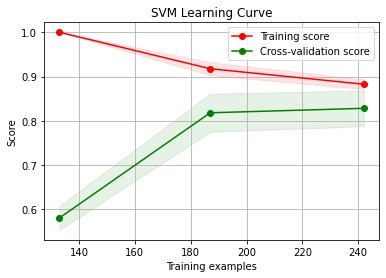

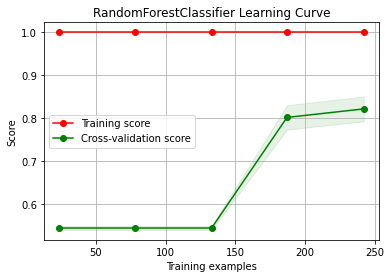

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have your data loaded into x and y
# Assuming you have your x_train, x_test, y_train, and y_test

# SVM
svm_clf = SVC(kernel='linear', C=1, random_state=42)
svm_clf.fit(x_train, y_train)

# RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

# Function to plot learning curves
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curves for SVM
plot_learning_curve(svm_clf, "SVM Learning Curve", x, y, cv=5, n_jobs=-1)
plt.show()

# Plot learning curves for RandomForestClassifier
plot_learning_curve(rf_model, "RandomForestClassifier Learning Curve", x, y, cv=5, n_jobs=-1)
plt.show()

### Feature Importance 


Feature Importance for SVM:
age: 0.1699
trtbps: -0.1909
chol: -0.0330
thalachh: 0.3376
oldpeak: -0.7097
sex_0: 0.1937
sex_1: -0.1937
cp_0: -0.2747
cp_1: -0.1314
cp_2: 0.2394
cp_3: 0.2965
fbs_0: -0.0518
fbs_1: 0.0518
restecg_0: -0.1125
restecg_1: 0.1122
restecg_2: 0.0000
exng_0: 0.1866
exng_1: -0.1866
caa_0: 0.4727
caa_1: -0.2965
caa_2: -0.2906
caa_3: -0.1636
caa_4: 0.1916
thall_0: -0.0000
thall_1: 0.0460
thall_2: 0.2610
thall_3: -0.2902

Feature Importance for RandomForestClassifier:
age: 0.0755
trtbps: 0.0622
chol: 0.0696
thalachh: 0.0975
oldpeak: 0.1107
sex_0: 0.0203
sex_1: 0.0249
cp_0: 0.0876
cp_1: 0.0125
cp_2: 0.0204
cp_3: 0.0097
fbs_0: 0.0073
fbs_1: 0.0081
restecg_0: 0.0174
restecg_1: 0.0134
restecg_2: 0.0005
exng_0: 0.0415
exng_1: 0.0449
caa_0: 0.0922
caa_1: 0.0262
caa_2: 0.0123
caa_3: 0.0088
caa_4: 0.0025
thall_0: 0.0001
thall_1: 0.0037
thall_2: 0.0814
thall_3: 0.0488


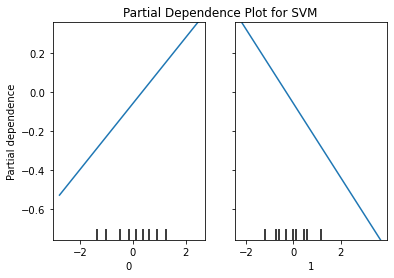

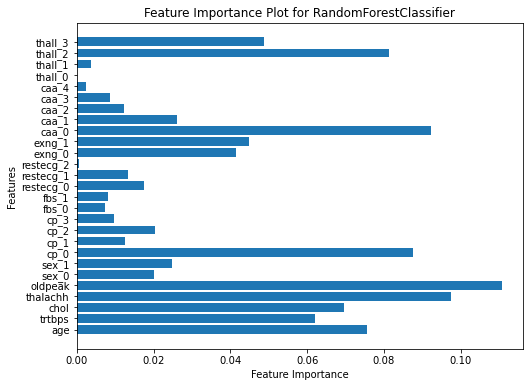

In [79]:
import matplotlib.pyplot as plt
from sklearn.inspection import plot_partial_dependence
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Standardize features for SVM
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# SVM
clf_svm = SVC(kernel='linear', C=1, random_state=42).fit(x_train_scaled, y_train)

# Feature importance for SVM (coefficients)
svm_coefficients = clf_svm.coef_[0]
feature_names = x.columns

# Print feature importance for SVM
print("\nFeature Importance for SVM:")
for feature, coef in zip(feature_names, svm_coefficients):
    print(f"{feature}: {coef:.4f}")

# Plot partial dependence for SVM (for one or two features)
fig, ax = plt.subplots()
plot_partial_dependence(clf_svm, x_train_scaled, features=[0, 1], ax=ax)
ax.set_title('Partial Dependence Plot for SVM')

# RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)

# Feature importance for RandomForestClassifier
rf_feature_importance = model_rf.feature_importances_

# Print feature importance for RandomForestClassifier
print("\nFeature Importance for RandomForestClassifier:")
for feature, importance in zip(feature_names, rf_feature_importance):
    print(f"{feature}: {importance:.4f}")

# Plot feature importance for RandomForestClassifier
plt.figure(figsize=(8, 6))
plt.barh(feature_names, rf_feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot for RandomForestClassifier')
plt.show()

In [30]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# SVM
x = data.drop('output', axis=1)
y = data['output']

# Instantiate and fit the SVM model
clf_svm = SVC(kernel='linear', C=1, random_state=42).fit(x_train, y_train)

# Predict the values
y_pred_svm = clf_svm.predict(x_test)

# Print the test accuracy
print("The test accuracy score of SVM is ", accuracy_score(y_test, y_pred_svm))

# Cross-validation for SVM
cv_svm = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_svm = cross_val_score(clf_svm, x, y, cv=cv_svm, scoring='accuracy')
print("SVM Cross-Validation Accuracy Scores", cv_scores_svm)

# Additional performance metrics for SVM
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)

# Confusion Matrix for SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("\nConfusion Matrix for SVM:")
print(conf_matrix_svm)

# RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)

# Predict the values
y_pred_rf = model_rf.predict(x_test)

# Print the test accuracy
print("\nAccuracy for RandomForestClassifier:", accuracy_score(y_test, y_pred_rf))

# Cross-validation for RandomForestClassifier
cv_rf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_rf = cross_val_score(model_rf, x, y, cv=cv_rf, scoring='accuracy')
print("RandomForestClassifier Cross-Validation Accuracy Scores", cv_scores_rf)

# Additional performance metrics for RandomForestClassifier
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

# Confusion Matrix for RandomForestClassifier
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix for RandomForestClassifier:")
print(conf_matrix_rf)

The test accuracy score of SVM is  0.9016393442622951
SVM Cross-Validation Accuracy Scores [0.90163934 0.85245902 0.73770492 0.85       0.83333333]

Confusion Matrix for SVM:
[[26  3]
 [ 3 29]]

Accuracy for RandomForestClassifier: 0.8524590163934426
RandomForestClassifier Cross-Validation Accuracy Scores [0.90163934 0.7704918  0.75409836 0.85       0.86666667]

Confusion Matrix for RandomForestClassifier:
[[25  4]
 [ 5 27]]


## crosssvalidation

In [106]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, x_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.819047619047619


## ROC_ CURVE

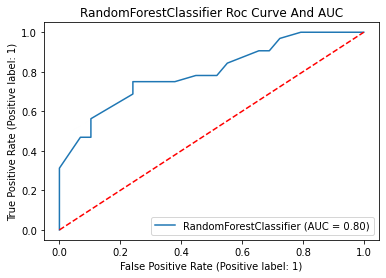

In [107]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model, x_test, y_test, name = "RandomForestClassifier")
plt.title("RandomForestClassifier Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()

## Precision recall curve

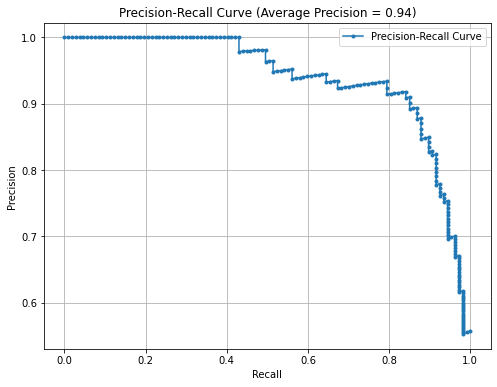

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x = data.drop('output', axis=1)
y = data['output']

x, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


model2 = LogisticRegression()
model2.fit(x_train, y_train)


y_pred_prob = model2.predict_proba(x_test)[:, 1]


precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
average_precision = average_precision_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (Average Precision = {average_precision:.2f})')
plt.legend()
plt.grid(True)


plt.show()

## Hyperparameter tuning using gridsearchchCV

In [109]:
from sklearn.model_selection import GridSearchCV

log_reg_new = LogisticRegression()
log_reg_new

parameters = {"penalty":["l1","l2"], "solver" : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

log_reg_grid = GridSearchCV(log_reg_new, param_grid = parameters)

x = data.drop('output', axis=1)
y = data['output']

log_reg_grid.fit(x_train, y_train)

log_reg_new2 = LogisticRegression(penalty = "l1", solver = "saga")
log_reg_new2

log_reg_new2.fit(x_train, y_train)

y_pred = log_reg_new2.predict(x_test)

print("The test accuracy score of Logistic Regression After hyper-parameter tuning is: {}".format(accuracy_score(y_test, y_pred)))

The test accuracy score of Logistic Regression After hyper-parameter tuning is: 0.86


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier

# Define hyperparameter grid
parameters = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV for Random Forest
rf_grid = GridSearchCV(rf_classifier, param_grid=parameters)

# Prepare data
x = data.drop('output', axis=1)
y = data['output']

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Perform GridSearchCV to find the best hyperparameters
rf_grid.fit(x_train, y_train)

# Initialize Random Forest Classifier with best hyperparameters
rf_classifier_best = RandomForestClassifier(**rf_grid.best_params_)
rf_classifier_best

# Fit the model with the training data
rf_classifier_best.fit(x_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier_best.predict(x_test)

# Print the accuracy score
print("The test accuracy score of Random Forest Classifier after hyperparameter tuning is: {}".format(accuracy_score(y_test, y_pred)))

The test accuracy score of Random Forest Classifier after hyperparameter tuning is: 0.8524590163934426


In [80]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_classifier, x_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.819047619047619


In [111]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg_new2, x_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.85


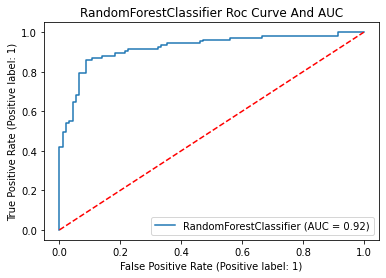

In [112]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(log_reg_new2, x_test, y_test, name = "RandomForestClassifier")
plt.title("RandomForestClassifier Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()

## Feature Importance 

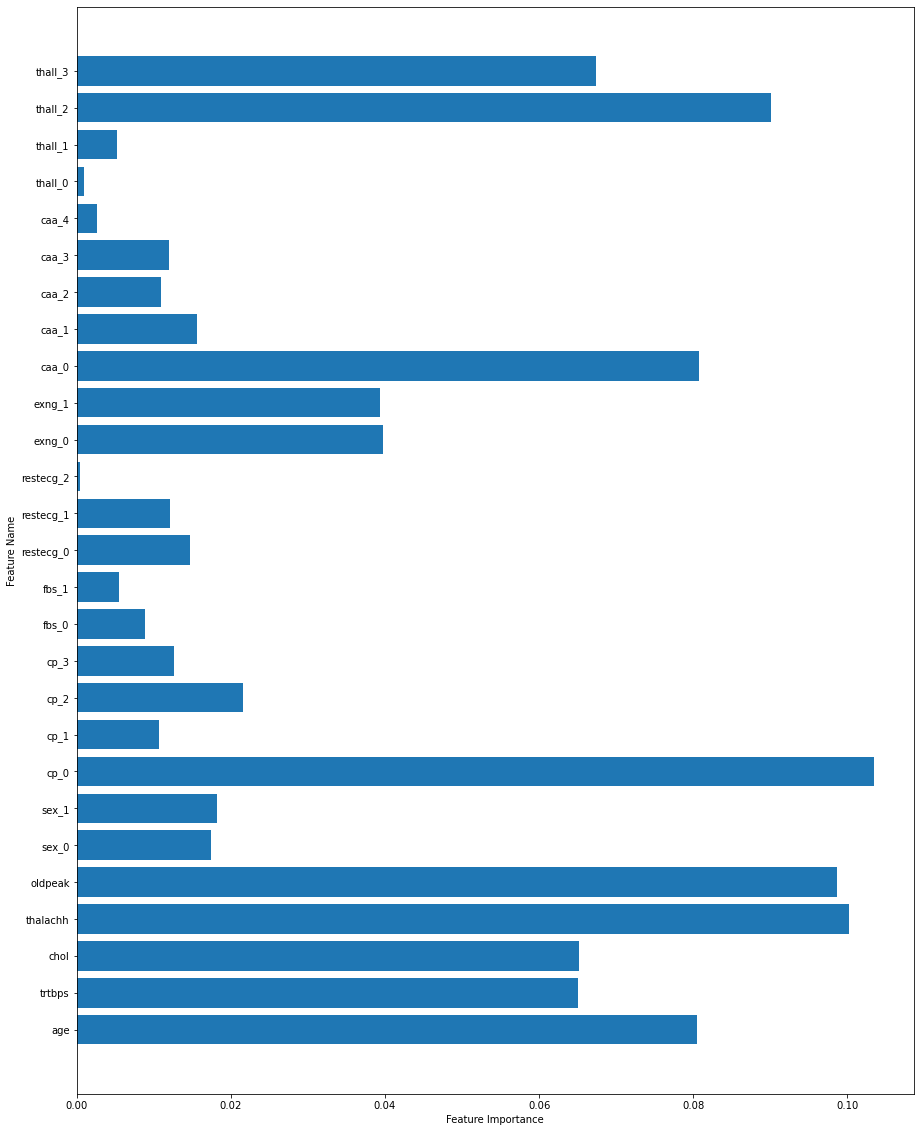

In [63]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


clf = RandomForestClassifier(n_estimators=100, random_state=0)

x = data.drop('output', axis=1)
y = data['output']


clf.fit(x, y)  


feature_importances = clf.feature_importances_


feature_names = list(x.columns) 


plt.figure(figsize=(15, 20))
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.show()


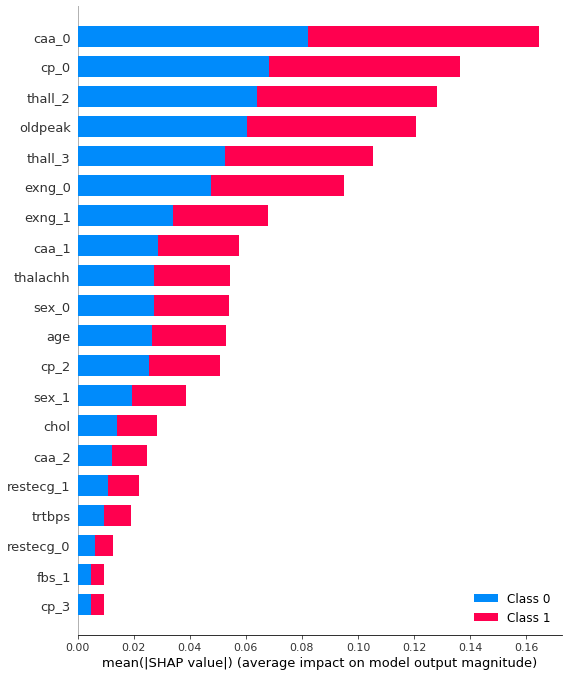

In [46]:
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


x = data.drop('output', axis=1)
y = data['output']

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train a model (Random Forest Classifier in this example)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

# Create a SHAP explainer object
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for a set of samples (e.g., the first 10 samples in the test set)
shap_values = explainer.shap_values(x_test[:10])

# Summary plot for feature importance
shap.summary_plot(shap_values, x_test[:10], feature_names= list(x.columns))

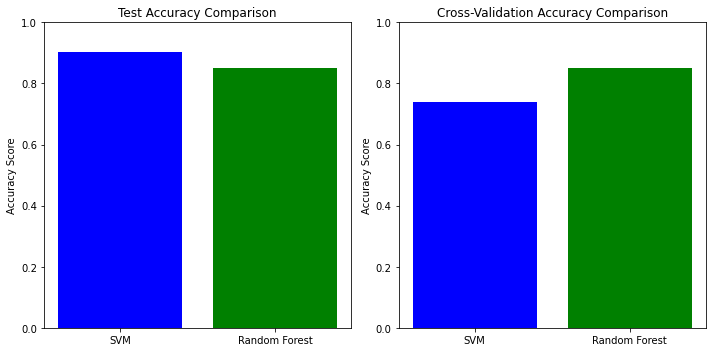

In [11]:
import matplotlib.pyplot as plt

# Test Accuracy Scores
svm_test_accuracy = 0.9016393442622951
rf_test_accuracy = 0.85

# Cross-Validation Accuracy Scores
svm_cv_accuracy = 0.7404761904761904
rf_cv_accuracy = 0.85

# Labels
labels = ['SVM', 'Random Forest']

# Test Accuracy Comparison
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(labels, [svm_test_accuracy, rf_test_accuracy], color=['blue', 'green'])
plt.title('Test Accuracy Comparison')
plt.ylim(0, 1)
plt.ylabel('Accuracy Score')

# Cross-Validation Accuracy Comparison
plt.subplot(1, 2, 2)
plt.bar(labels, [svm_cv_accuracy, rf_cv_accuracy], color=['blue', 'green'])
plt.title('Cross-Validation Accuracy Comparison')
plt.ylim(0, 1)
plt.ylabel('Accuracy Score')

plt.tight_layout()
plt.show()

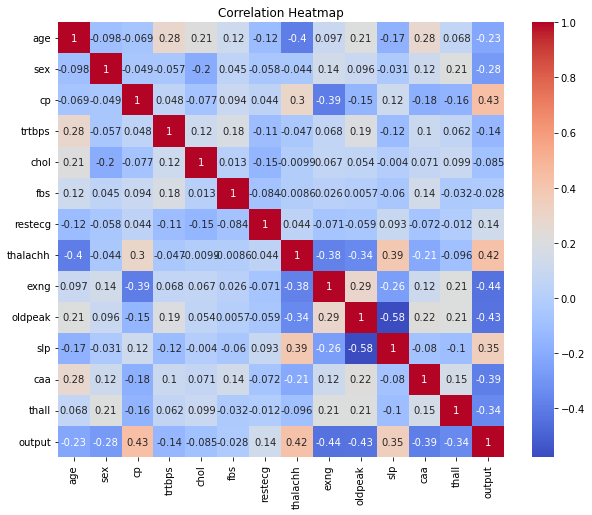

In [8]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()